##**Modélisation du risque de crédit dans R**
+ *4 heures*
+ *16 Vidéos*
+ *52 Exercices*
+ *44 385 participants*
+ *4 000 XP*

###**Description du cours**

+ ***Ce cours pratique avec des données de crédit réelles vous apprendra comment modéliser le risque de crédit en utilisant la régression logistique et les arbres de décision dans R.***
+ ***La modélisation du risque de crédit pour les prêts aux particuliers et aux entreprises est d'une importance majeure pour les banques. La probabilité qu'un débiteur fasse défaut est un élément clé pour arriver à une mesure du risque de crédit. Alors que d'autres modèles seront également introduits dans ce cours, vous découvrirez deux types de modèles qui sont souvent utilisés dans le contexte de la notation du crédit ; régression logistique et arbres de décision. Vous apprendrez comment les utiliser dans ce contexte particulier, et comment ces modèles sont évalués par les banques.***

####**1) Introduction et prétraitement des données**

+ ***Ce chapitre commence par une introduction générale aux modèles de risque de crédit. Nous allons explorer un ensemble de données réelles, puis prétraiter l'ensemble de données afin qu'il soit dans le format approprié avant d'appliquer les modèles de risque de crédit.***

|OBJECTIFS|
|------------------|
Introduction et structure des données
Explorer les données de crédit
Interprétation d'un CrossTable()
Histogrammes et valeurs aberrantes
Histogrammes
Valeurs aberrantes
Données manquantes et classification grossière
Suppression des données manquantes
Remplacement des données manquantes
Conserver les données manquantes
Matrices de fractionnement et de confusion des données
Fractionner l'ensemble de données
Créer une matrice de confusion

####**2) Régression logistique**
+ ***La régression logistique est encore une méthode largement utilisée dans la modélisation du risque de crédit. Dans ce chapitre, vous apprendrez à appliquer des modèles de régression logistique sur des données de crédit dans R.***

|OBJECTIFS|
|------------------|
Régression logistique : introduction
Régression logistique de base
Interpréter les probabilités d'une variable catégorielle
Variables multiples dans un modèle de régression logistique
Interprétation des niveaux de signification
Régression logistique : prédire la probabilité de défaut
Prédire la probabilité de défaut
Faire des modèles plus discriminants
Évaluation du résultat du modèle de régression logistique
Spécification d'un seuil
Comparer deux seuils
Conclusion et remarques
Comparaison des fonctions de liaison pour une coupure donnée

####**3) Arbres de décision**

+ ***Les arbres de classification sont une autre méthode populaire dans le monde de la modélisation du risque de crédit. Dans ce chapitre, vous apprendrez à créer des arbres de classification à l'aide des données de crédit dans R.***

|OBJECTIFS|
|------------------|
Qu'est-ce qu'un arbre de décision ?
Calcul du gain pour un arbre
Changer un Gini...
Construire des arbres de décision à l'aide du package rpart()
Sous-échantillonner l'ensemble de formation
Modification des probabilités a priori
Y compris une matrice de perte
Élaguer l'arbre de décision
Élaguer l'arbre avec des probabilités a priori modifiées
Tailler l'arbre avec la matrice de perte
Autres options d'arborescence et construction de matrices de confusion
Un dernier arbre utilisant plus d'options
Matrices de confusion et précision de nos arbres finaux
Optimisation de la précision

####**4) Évaluer un modèle de risque de crédit**

+ ***Dans ce chapitre, vous apprendrez comment évaluer et comparer les résultats obtenus grâce à plusieurs modèles de risque de crédit.***

|OBJECTIFS|
|------------------|
Trouver le bon cut-off : la courbe stratégique
Calculer un mauvais taux étant donné un taux d'acceptation fixe
Le tableau de stratégie et la courbe de stratégie
Arborer ou ne pas arborer ?
La courbe ROC
Courbes ROC pour la comparaison des modèles de régression logistique
Courbes ROC pour la comparaison de modèles arborescents
Sélection d'entrée basée sur l'AUC
Un autre cycle d'élagage basé sur l'AUC
Meilleur des quatre
Réduction supplémentaire du modèle ?
Résumé du cours

In [ ]:
# Install the package
install.packages('gmodels')
install.packages('rpart')
install.packages('pROC')
install.packages('ROSE')
install.packages('rpart.plot')

In [99]:
# Load the package
library(gmodels)
library(rpart)
library(pROC)
library(ROSE)
library(rpart.plot)

###**Introduction et structure des données**

####**1. Introduction et structure des données**

+ ***Bonjour et bienvenue dans la première vidéo du cours de modélisation du risque de crédit. Je m’appelle Lore, je suis data scientist chez DataCamp, et je vais vous aider à maîtriser quelques bases du domaine de la modélisation du risque de crédit.***

####**2. Qu’est-ce qu’un défaut de paiement?**

+ Le domaine de la modélisation du risque de crédit concerne le cas de défaut de paiement. 

+ Maintenant, qu’est-ce qu’un défaut de paiement? 

+ **Lorsqu’une banque accorde un prêt à un emprunteur, qui peut être un particulier ou une entreprise, la banque transfère généralement le montant total du prêt à l’emprunteur.**

####**3. Qu’est-ce qu’un défaut de paiement?**

+ **L’emprunteur remboursera ensuite ce montant en plus petits morceaux, y compris certains paiements d’intérêts, au fil du temps. Habituellement, ces paiements ont lieu mensuellement, trimestriellement ou annuellement.**

####**4. Qu’est-ce qu’un défaut de paiement?**
+ **Bien sûr, il y a un certain risque qu’un emprunteur ne soit pas en mesure de rembourser intégralement ce prêt. Il en résulte une perte pour la banque.**

####**5. Composantes de la perte attendue (EL)**
+ La perte attendue d’une banque est composée de trois éléments. 
  + **Le premier élément est la probabilité de défaut, qui est la probabilité que l’emprunteur ne parvienne pas à rembourser intégralement le prêt**. 
  
  + **Le deuxième élément est l’exposition au défaut, ou EAD, qui est la valeur attendue du prêt au moment du défaut. Vous pouvez également considérer cela comme le montant du prêt qui doit encore être remboursé au moment du défaut.** 
  
  + **Le troisième élément est la perte en cas de défaut, qui est le montant de la perte en cas de défaut, exprimé en pourcentage de l’EAD. La multiplication de ces trois éléments conduit à la formule de la perte attendue.**

####**6. Composantes de la perte attendue (EL)**
+ Dans ce cours, nous nous concentrerons sur la probabilité de défaut.

####**7. Informations utilisées par les banques**
+ Les banques conservent des informations sur le comportement par défaut des anciens clients, qui peuvent être utilisées pour prédire le défaut de paiement des nouveaux clients. 

+ En gros, ces informations peuvent être classées en deux types. 

+ **Le premier type d’information est l’information sur l’application**. 
  + Des exemples de renseignements sur les demandes sont le revenu, l’état matrimonial, etc. 
  
+ **Le deuxième type d’information, les informations comportementales, suit le comportement passé des clients, par exemple, le solde du compte courant et l’historique des arriérés de paiement. Jetons un coup d’œil aux dix premières lignes de notre ensemble de données.**

####**8. Les données**
+ Cet ensemble de données contient des informations sur les prêts passés. 

+ **Chaque ligne représente un client et ses informations, ainsi qu’un indicateur d’état du prêt, qui est égal à 1 si le client est en défaut et à 0 si le client n’a pas fait défaut.** 

+ Le statut du prêt sera utilisé comme variable de réponse, et les variables explicatives sont le montant du prêt, le taux d’intérêt, la note, la durée de l’emploi, le statut d’accession à la propriété, le revenu annuel et l’âge. 

+ La note est le score du bureau du client, où A indique la classe de solvabilité la plus élevée et G la plus basse. 

+ Ce score de bureau reflète les antécédents de crédit de la personne et est la seule variable comportementale dans l’ensemble de données.

####**9. Table croisée**
+ Pour obtenir une vue d’ensemble de la structure de données des variables catégorielles, vous pouvez utiliser la fonction CrossTable() dans le package gmodels. 

+ En appliquant cette fonction à la variable home_ownership, vous obtenez un tableau avec chacune des catégories de cette variable, avec le nombre de cas et les proportions.

####**10. Table croisée**
+ En utilisant le statut de prêt comme deuxième argument, vous pouvez examiner la relation entre cette variable de facteur et la réponse. 

+ En définissant prop r est égal à TRUE et les autres proportions répertoriées ici à FALSE, vous obtenez les proportions par ligne. 

+ Maintenant, qu’est-ce que ce résultat vous dit? 

+ Il semble que le taux de défaut dans le groupe d’accession à la propriété AUTRE soit un peu plus élevé que le taux de défaut dans, par exemple, le groupe d’accession à la propriété MORTGAGE, avec 17,5 contre 9,8% des défauts dans ces groupes, respectivement.

####**11. Entraînons-nous!**
+ Explorons maintenant d’autres aspects des données à l’aide de R.

###**EXERCICES**

####**Explorer les données de crédit**

+ ***Nous examinerons l'ensemble de données loan_data discuté dans la vidéo tout au long des exercices de ce cours.***

+ ***Après avoir reçu loan_data, vous êtes particulièrement intéressé par les prêts en défaut dans l'ensemble de données. Vous voulez avoir une idée du nombre et du pourcentage de valeurs par défaut. Les défauts de paiement sont rares, vous souhaitez donc toujours vérifier quelle est la proportion de défauts de paiement dans un ensemble de données de prêt. La fonction CrossTable() est très utile ici.***

+ *N'oubliez pas que les informations par défaut sont stockées dans la variable de réponse loan_status, où 1 représente une valeur par défaut et 0 une valeur non par défaut.*

+ *Pour en savoir plus sur les structures de variables et repérer les tendances inattendues dans les données, vous devez examiner la relation entre loan_status et certaines variables factorielles. Par exemple, vous vous attendriez à ce que la proportion de défauts dans le groupe de clients avec la note G (la pire note de solvabilité) soit considérablement plus élevée que la proportion de défauts dans le groupe de la note A (la meilleure note de solvabilité).*

+ *De manière pratique, CrossTable() peut également être appliqué sur deux variables catégorielles. Explorons!*

####**Instructions**

+ Familiarisez-vous avec le jeu de données en examinant sa structure avec str().

+ Chargez le package gmodels à l'aide de library(). Il est déjà installé sur les serveurs de DataCamp.

+ Jetez un œil au CrossTable() de l'état du prêt, en utilisant un seul argument : 
  + loan_data$loan_status.

+ Appelez CrossTable() avec :

    + l'argument x loan_data$grade et 
    
    + l'argument y loan_data$loan_status. 

+ Nous ne voulons que des proportions par ligne, 
  + alors définissez prop.r sur TRUE, 
  
  + mais prop.c , prop.t et prop.chisq sur FALSE (les valeurs par défaut ici sont TRUE, et cela conduirait à l'inclusion des proportions de colonne, des proportions de table et contributions du chi carré pour chaque cellule. Nous n'en avons pas besoin ici.)

In [3]:
loan_data <- readRDS("/content/loan_data_ch1.rds")

In [4]:
# View the structure of loan_data
str(loan_data)

'data.frame':	29092 obs. of  8 variables:
 $ loan_status   : int  0 0 0 0 0 0 1 0 1 0 ...
 $ loan_amnt     : int  5000 2400 10000 5000 3000 12000 9000 3000 10000 1000 ...
 $ int_rate      : num  10.7 NA 13.5 NA NA ...
 $ grade         : Factor w/ 7 levels "A","B","C","D",..: 2 3 3 1 5 2 3 2 2 4 ...
 $ emp_length    : int  10 25 13 3 9 11 0 3 3 0 ...
 $ home_ownership: Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 3 4 4 4 4 ...
 $ annual_inc    : num  24000 12252 49200 36000 48000 ...
 $ age           : int  33 31 24 39 24 28 22 22 28 22 ...


In [5]:
# Load the gmodels package 
library(gmodels)

# Call CrossTable() on loan_status
CrossTable(loan_data$loan_status)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  29092 

 
          |         0 |         1 | 
          |-----------|-----------|
          |     25865 |      3227 | 
          |     0.889 |     0.111 | 
          |-----------|-----------|



 


In [6]:
# Call CrossTable() on grade and loan_status
CrossTable(loan_data$grade, 
           loan_data$loan_status,
            prop.r = TRUE,
            prop.c = FALSE,
            prop.t=FALSE,
            prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  29092 

 
                | loan_data$loan_status 
loan_data$grade |         0 |         1 | Row Total | 
----------------|-----------|-----------|-----------|
              A |      9084 |       565 |      9649 | 
                |     0.941 |     0.059 |     0.332 | 
----------------|-----------|-----------|-----------|
              B |      8344 |       985 |      9329 | 
                |     0.894 |     0.106 |     0.321 | 
----------------|-----------|-----------|-----------|
              C |      4904 |       844 |      5748 | 
                |     0.853 |     0.147 |     0.198 | 
----------------|-----------|-----------|-----------|
              D |      2651 |       580 |      3231 | 
                |     0.820 |     0.180 |     0.111 | 
----------------|-----------|-----------|-----------|
              E |  

####**Interprétation d'un CrossTable()**

+ ***Comment interpréteriez-vous les résultats du tableau que vous avez construit à la fin de l'exercice précédent ? Pour rappel, voici le code pour produire le CrossTable(). Vous pouvez y jeter un autre coup d'œil dans la console R.***

        CrossTable(loan_data$grade, loan_data$loan_status, prop.r = TRUE, 
           prop.c = FALSE, prop.t = FALSE, prop.chisq = FALSE)


####**Instructions**


+ ***La proportion de défauts augmente lorsque la cote de crédit passe de A à G.***

+ La proportion de défauts diminue lorsque la cote de crédit passe de A à G.

+ La proportion de défauts reste relativement stable lorsque la cote de crédit passe de A à G.

***Bon! La proportion de défauts de paiement augmente avec les pires cotes de crédit, comme on peut s'y attendre.***

###**Histogrammes et valeurs aberrantes**

####**1. Histogrammes et valeurs aberrantes**

+ ***Examinons maintenant quelques variables continues à l’aide d’histogrammes et de graphiques.***

####**2. Utilisation de la fonction hist()**
+ **Pour un histogramme de base, vous appelez la fonction hist() avec la variable d’intérêt, dans ce cas, taux d’intérêt.**

####**3. Utilisation de la fonction hist()**
+ Vous pouvez utiliser les arguments main et xlab pour des étiquettes plus agréables. 

+ Les fréquences de la variable d’intérêt sont indiquées sur l’axe des y. 

+ Ici, vous pouvez voir que tous les prêts avaient un taux d’intérêt supérieur à 5% et que très peu de prêts avaient un taux d’intérêt supérieur à 20%.

####**4. Utilisation de la fonction hist() sur annual_inc**
+ Jetons un coup d’œil à l’histogramme du revenu annuel.
+ Nous remarquons que nous obtenons un résultat étrange ici, avec apparemment juste une grande barre.

####**5. Utilisation de la fonction hist() sur annual_inc**
+ En stockant l’histogramme dans hist_income et en utilisant des sauts de signe dollar, nous obtenons des informations sur l’emplacement des sauts d’histogramme. Afin d’avoir une idée claire de la structure des données,

####**6. L’argument des ruptures**
+ Vous pouvez modifier le nombre de pauses à l’aide de l’argument Pauses, de sorte que vous obteniez un tracé plus intuitif. 

+ Cela peut être fait en choisissant un nombre qui semble plus approprié ou en utilisant une règle empirique, telle que la racine carrée du nombre d’observations dans l’ensemble de données. 

+ Il en résulte un vecteur de cassures beaucoup plus long. 

+ Cependant, le résultat n’est toujours pas très agréable ici, avec beaucoup d’espace vide. 

+ L’axe des x de l’histogramme s’étend automatiquement de la plus petite valeur observée à la plus grande.

####**7. annual_inc**
+ Regardons un nuage de points pour voir ce qui se passe. 
+ Dans ce graphique, le revenu annuel est indiqué sur l’axe des y, et le numéro d’indice de l’observation est indiqué sur l’axe des x.

####**8. annual_inc**
+ Nous voyons qu’il y a un énorme salaire de 6 millions de dollars où aucun des autres n’est supérieur à environ 2 millions de dollars. 
+ Nous considérons qu’il s’agit d’une aberration.

####**9. Valeurs aberrantes**
+ ***En statistique, une valeur aberrante est une observation anormalement éloignée des autres valeurs.***

+ Mais quand une distance est-elle anormale ? En général, les scientifiques des données utiliseront leur jugement d’expert, leurs règles empiriques ou une combinaison des deux.

####**10. Jugement d’expert**
+ Le jugement d’expert pourrait être utilisé si le scientifique des données est considéré comme un expert dans le domaine de la modélisation du risque de crédit. 

+ Il peut alors juger qu’un salaire annuel supérieur, disons, à 3 millions de dollars doit être une erreur et devrait être supprimé de l’ensemble de données.

####**11. Règle empirique**
+ Si un data scientist veut s’appuyer sur une règle empirique, il peut supprimer toutes les valeurs supérieures ou inférieures à 1,5 fois la plage interquartile, qui est la plage entre le premier et le troisième quartile de la distribution de la variable. 

+ Comme les valeurs aberrantes dans la fourchette négative ne se sont pas produites ici, nous ne supprimons que celles dans la plage positive.

####**12. Histogrammes**
+ Après avoir supprimé les valeurs aberrantes, vous obtenez les résultats suivants. 

+ Ces histogrammes sont plus informatifs que les premiers histogrammes, y compris les valeurs aberrantes, en particulier l’histogramme qui a été construit à l’aide de la règle empirique. 

+ Notez que pas mal d’observations ont été supprimées en utilisant cette règle empirique. 

+ Même si vous ne prévoyez pas de laisser ces valeurs aberrantes dans votre analyse, il peut toujours être utile de les supprimer temporairement lors de la visualisation des données.

####**13. Tracé bivarié**
+ Concluons en examinant un graphique bivarié. 

+ Lorsque vous incluez une deuxième variable dans la fonction plot(), le premier argument sera tracé sur l’axe des x et le second argument sur l’axe des y. 

+ Un graphique bivarié pour la durée de l’emploi et le revenu annuel est présenté ici. 

+ Examiner les graphiques bivariés peut être intéressant pour suivre les valeurs aberrantes bivariées, qui sont des valeurs aberrantes sur deux dimensions des données.

####**14. Tracé bivarié**
+ Pour la combinaison tracée ici, nous ne voyons qu’une valeur aberrante sur l’échelle du revenu annuel et non pour la durée de l’emploi.

####**15. Entraînons-nous!**
+ Essayons maintenant de faire quelques graphiques et histogrammes nous-mêmes.

###**EXERCICES**

####**Histogrammes**

+ ***L'ensemble de données loan_data est chargé dans votre espace de travail. Vous avez précédemment exploré les variables catégorielles à l'aide de la fonction CrossTable(). Vous souhaitez maintenant explorer les variables continues pour identifier les valeurs aberrantes potentielles ou les structures de données inattendues.***

+ *Pour cela, expérimentons la fonction hist() pour comprendre la distribution du nombre de prêts pour différents clients.*

####**Instructions**

+ Utilisez hist() pour créer un histogramme avec un seul argument : loan_data$loan_amnt. 

+ Affectez le résultat à un nouvel objet appelé hist_1.


+ Utilisez $breaks avec l'objet hist_1 pour obtenir plus d'informations sur les ruptures d'histogramme. 

+ Connaître l'emplacement des ruptures est important car si elles sont mal choisies, l'histogramme peut être trompeur.


+ Modifiez le nombre de sauts dans hist_1 à 200 en spécifiant l'argument breaks. 

+ De plus, nommez l'axe des x "Montant du prêt" à l'aide de l'argument xlab et intitulez-le "Histogramme du montant du prêt" à l'aide de l'argument principal. 

+ Enregistrez le résultat dans hist_2. Pourquoi les pics se produisent-ils là où ils se produisent ?

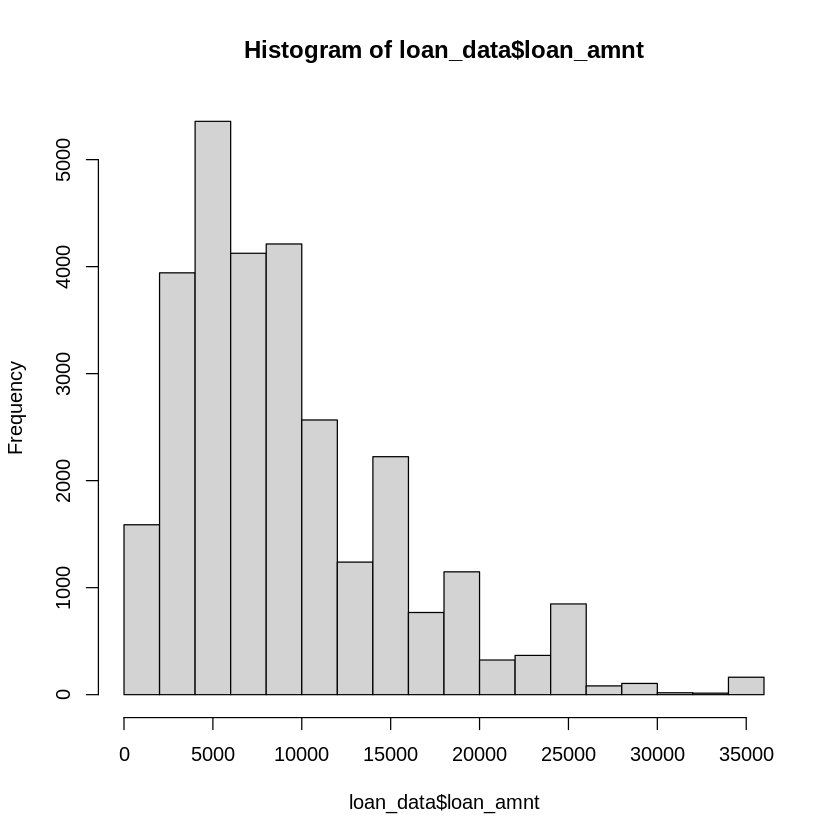

In [7]:
# Create histogram of loan_amnt: hist_1
hist_1 <- hist(loan_data$loan_amnt)

In [8]:
# Print locations of the breaks in hist_1
hist_1$breaks

[1]     0  2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000
[13] 24000 26000 28000 30000 32000 34000 36000

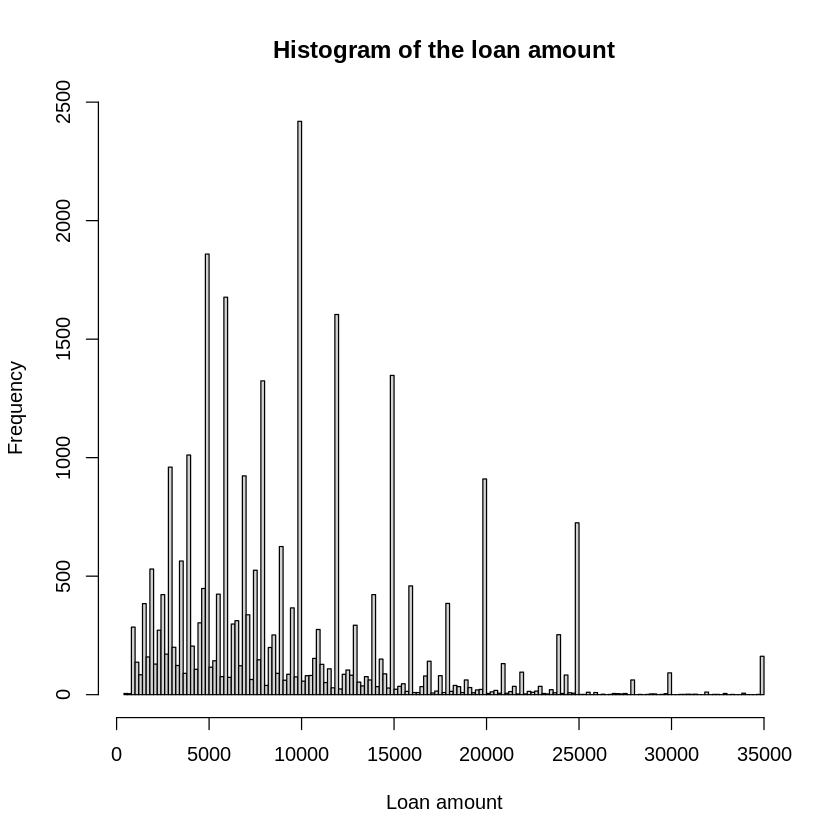

In [9]:
# Change number of breaks and add labels: hist_2
hist_2 <- hist(loan_data$loan_amnt, breaks = 200, xlab = "Loan amount", 
               main = "Histogram of the loan amount")

***Bingo ! Notez qu'il existe des pics élevés aux valeurs rondes : 5 000, 10 000, 15 000,… Les gens ont tendance à emprunter des nombres ronds. C'est logique, non ?***

####**Valeurs aberrantes**
+ ***Il est maintenant temps d'examiner la structure de la variable âge. Un histogramme est tracé sur votre droite. Semblable à ce que vous avez observé dans la vidéo pour le revenu annuel (annual_inc), il y a beaucoup d'espace vide sur le côté droit du tracé. Ceci est une indication d'éventuelles valeurs aberrantes. Vous regarderez un nuage de points pour vérifier cela. Si vous trouvez des valeurs aberrantes, vous les supprimerez.***

+ *Si des valeurs aberrantes sont observées pour plusieurs variables, il peut être utile d'examiner les graphiques bivariés. Il est possible que les valeurs aberrantes appartiennent à la même observation. Si tel est le cas, il y a encore plus de raisons de supprimer l'observation car il est plus probable que certaines informations qui y sont stockées soient erronées.*

####**Instructions**

+ Construisez un nuage de points de la variable age (via loan_data$age) à l'aide de la fonction plot(). 

+ Donnez à l'axe des ordonnées l'étiquette appropriée "Âge" en utilisant ylab comme deuxième argument.


+ La personne la plus âgée de cet ensemble de données a plus de 122 ans ! Obtenez l'indice de cette valeur aberrante en utilisant which() et l'âge de 122 ans comme seuil (vous pouvez le faire en utilisant loan_data$age > 122). 

+ Affectez-le à l'objet index_highage.


+ Créez un nouvel ensemble de données new_data, après avoir supprimé l'observation avec l'âge le plus élevé à l'aide de l'objet index_highage.


+ Jetez un œil au nuage de points bivarié, avec l'âge sur l'axe des x et le revenu annuel sur l'axe des y. 

+ Remplacez les étiquettes par "Âge" et "Revenu annuel", respectivement.

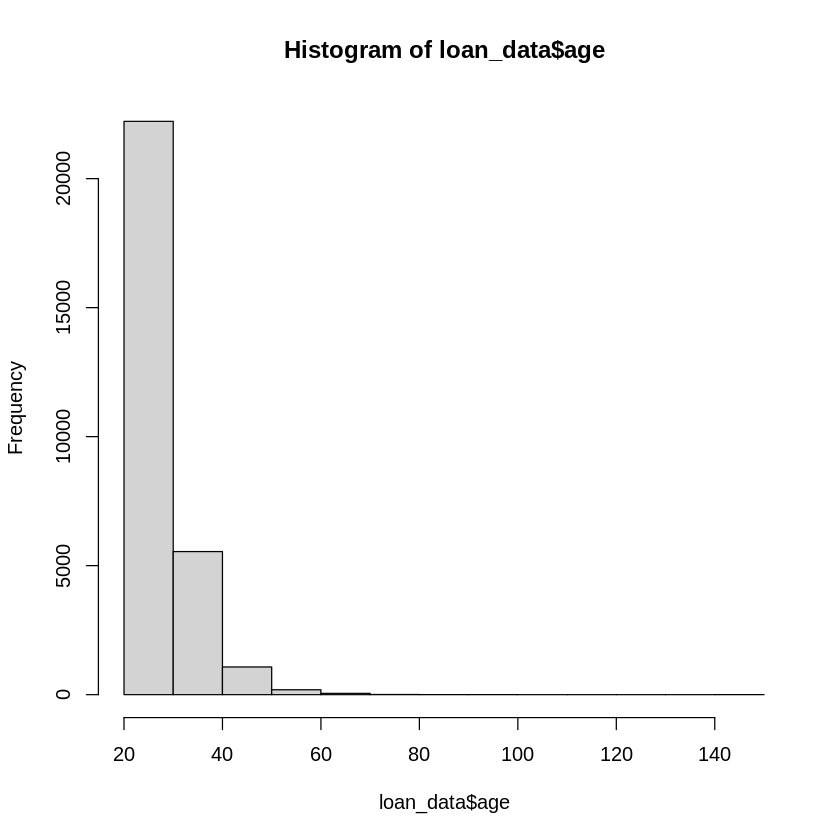

In [10]:
hist(loan_data$age)

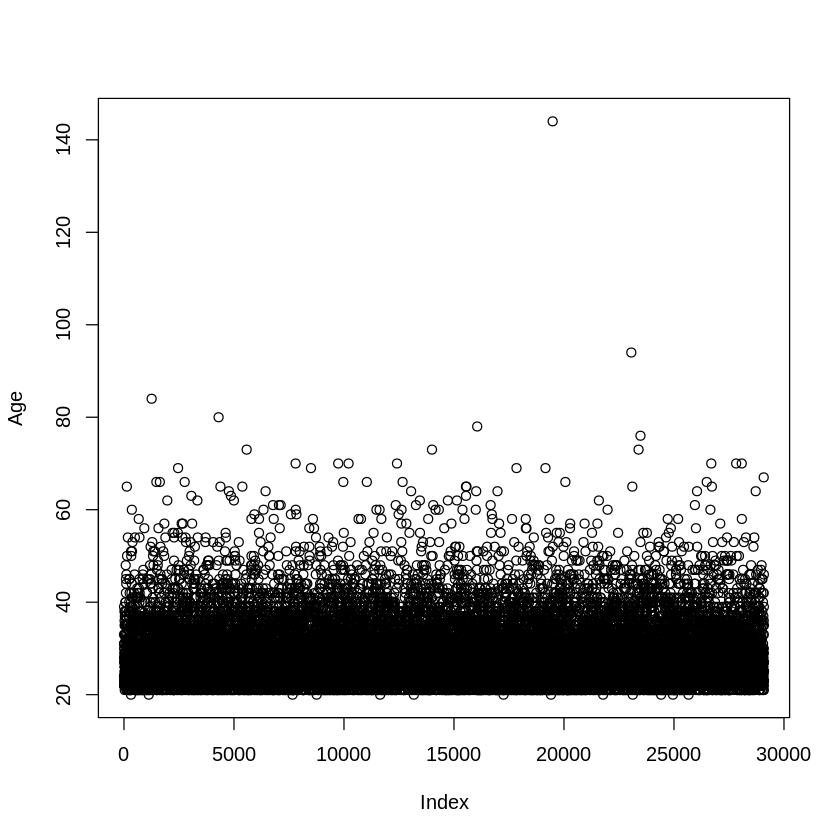

In [11]:
# Plot the age variable
plot(loan_data$age, ylab = "Age")

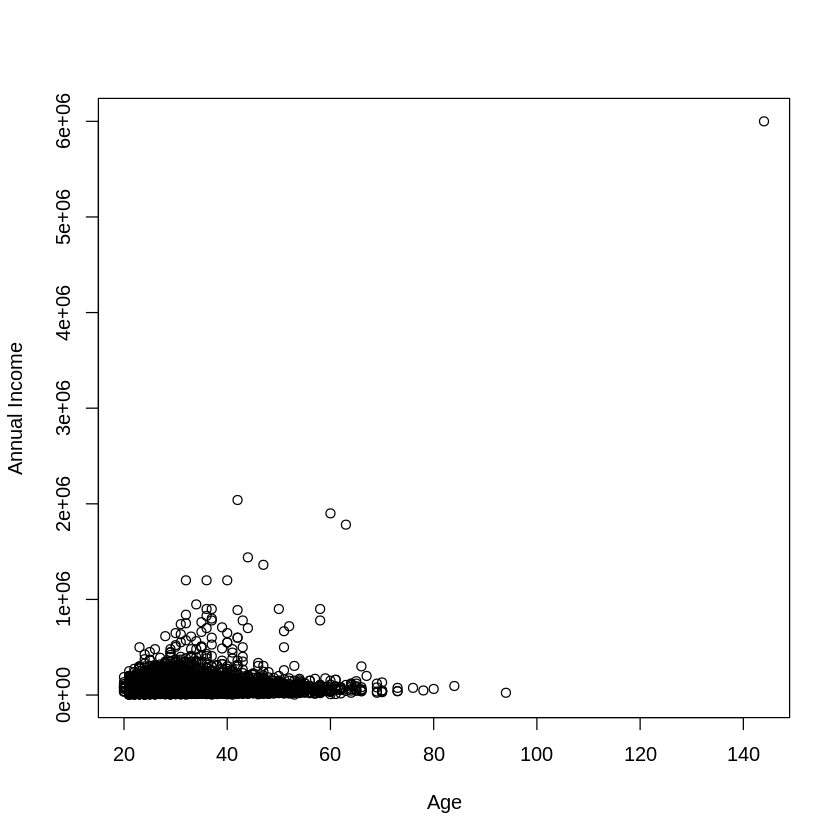

In [12]:
# Save the outlier's index to index_highage
index_highage <- which(loan_data$age > 122)

# Create data set new_data with outlier deleted
new_data <- loan_data[-index_highage, ]

# Make bivariate scatterplot of age and annual income
plot(loan_data$age, loan_data$annual_inc,xlab = "Age", ylab = "Annual Income")

***Super! Avez-vous remarqué que vous avez une valeur aberrante bivariée ? La personne avec l'énorme salaire annuel de 6 millions de dollars semblait avoir 144 ans. Il doit s'agir d'une erreur, vous supprimerez donc définitivement cette observation des données dans les exercices suivants.***

###**Données manquantes et classification grossière**

####**1. Données manquantes et classification grossière**
+ Maintenant

####**2. Valeur aberrante supprimée**
+ Nous avons supprimé de l’ensemble de données l’observation contenant une valeur aberrante bivariée pour l’âge et le revenu annuel.

####**3. Entrées manquantes**
+ Ce dont nous n’avons pas discuté auparavant, c’est qu’il manque des intrants (ou NA, qui signifient non disponibles) pour deux variables: 
  + **la durée de l’emploi et le taux d’intérêt**. 
  
+ Dans cette vidéo, nous présenterons certaines méthodes de traitement des données manquantes sur la variable de la durée de l’emploi. Vous pratiquerez vous-même ces connaissances nouvellement acquises sur le taux d’intérêt variable.

####**4. Entrées manquantes**
+ Tout d’abord, vous voulez savoir combien d’entrées sont manquantes, car cela affectera ce que vous en faites. 

+ Un moyen simple de le savoir est avec la fonction summary(). 

+ Si vous faites cela pour la durée de l’emploi, vous verrez qu’il y a 809 NA.

####**5. Intrants manquants : stratégies**
+ Il existe généralement trois façons de traiter les entrées manquantes : 
  + les supprimer, 
  + les remplacer 
  + ou les conserver. 
+ Nous illustrerons ces méthodes sur la durée de l’emploi. 
+ Lors de la suppression, vous pouvez soit supprimer les observations où des entrées manquantes sont détectées, soit supprimer une variable entière. 

+ En règle générale, vous ne souhaiterez supprimer des observations que s’il n’y a qu’un petit nombre d’entrées manquantes et n’envisageriez de supprimer une variable entière que lorsque de nombreux cas sont manquants.

####**6. Supprimer des lignes**
+ **En utilisant cette construction avec which() et is.na(), les lignes avec des entrées manquantes sont supprimées dans le nouvel ensemble de données loan_data_no_NA.**

####**7. Supprimer la colonne**
+ Pour supprimer toute la variable durée de l’emploi, il vous suffit de définir la variable de durée de l’emploi dans les données de prêt égale à NULL. 
+ Ici, nous enregistrons le résultat dans une copie de l’ensemble de données appelé loan_data_delete_employ. 
+ Faire une copie de vos données d’origine avant de supprimer des éléments peut être un bon moyen d’éviter de perdre des informations, mais peut être coûteux si vous travaillez avec de très grands ensembles de données.

####**8. Remplacer : imputation médiane**
+ Deuxièmement, lors du remplacement d’une variable, la pratique courante consiste à remplacer les valeurs manquantes.

####**9. Remplacer : imputation médiane**
+ avec la médiane des valeurs réellement observées. 
+ **C’est ce qu’on appelle l’imputation médiane.**

####**10. Conserver**
+ Enfin, vous pouvez conserver les valeurs manquantes, car dans certains cas, le fait qu’une valeur soit manquante est une information importante. 
+ Malheureusement, il n’est pas toujours possible de conserver les NA en tant que tels, car certaines méthodes supprimeront automatiquement les lignes avec les NA car elles ne peuvent pas les gérer. 

+ Alors, comment pouvons-nous garder les NA? Une solution populaire est la classification grossière. 

+ En utilisant cette méthode, vous mettez essentiellement une variable continue dans ce qu’on appelle des bacs. 

+ Commençons par créer une nouvelle variable emp_cat, qui sera la variable remplaçant emp_length. 

+ La durée de l’emploi dans notre ensemble de données varie de 0 à 62 ans. 

+ Nous mettrons la durée d’emploi dans des bacs d’environ 15 ans, avec les groupes 0 à 15, 15 à 30, 30 à 45, 45 ans et plus, et un groupe « manquant », représentant les NA. 
+ Voyons comment cela change nos données.

####**11. Conserver : classification grossière**
####**12. Conserver : classification grossière**
####**13. Fréquences des bacs**
+ Regardons le tracé de cette nouvelle variable factorielle. 
+ Il semble que la cellule '0-15' contienne une proportion très élevée des cas, il peut donc sembler plus raisonnable d’examiner des cellules de gammes différentes mais avec des fréquences similaires,

####**14. Fréquences des bacs**
+ Vous pouvez obtenir ces résultats par essais et erreurs pour différentes plages de bacs, ou en utilisant des fonctions quantiles pour savoir exactement où les pauses doivent être pour obtenir des bacs plus équilibrés.

####**15. Remarques finales**
+ Avant d’essayer tout cela dans R vous-même, permettez-moi de terminer la vidéo avec quelques remarques. 

+ Tout d’abord, toutes les méthodes de traitement des données manquantes peuvent également être appliquées aux valeurs aberrantes. 
+ Si vous pensez qu’une valeur aberrante est erronée, vous pouvez la traiter comme NA et utiliser l’une des méthodes dont nous avons discuté dans ce chapitre.

####**16. Remarques finales**
+ Deuxièmement, vous avez peut-être remarqué que je n’ai parlé que de l’absence de variables continues dans ce chapitre. 
+ Qu’en est-il des variables factorielles? 

+ Voici l’approche de base. Pour les variables catégorielles, la suppression fonctionne exactement de la même manière que pour les variables continues, en supprimant soit des observations, soit des variables entières. 

+ Lorsque nous souhaitons remplacer une variable factorielle manquante, cela se fait en l’affectant à la classe modale, qui est la classe avec la fréquence la plus élevée. 
+ Le maintien des NA pour une variable catégorielle se fait en incluant une catégorie manquante.

####**17. Entraînons-nous!**
+ Maintenant, essayons certaines de ces méthodes vous-même!

###**EXERCICES**

####**Suppression des données manquantes**
+ ***Vous avez vu précédemment que le taux d'intérêt (int_rate) dans l'ensemble de données loan_data dépend du client. Malheureusement, certaines observations manquent de taux d'intérêt. Vous devez maintenant identifier le nombre de taux d'intérêt manquants, puis les supprimer.***

+ *Dans cet exercice, vous utiliserez la fonction which() pour créer un index de lignes contenant un NA. Vous utiliserez ensuite cet index pour supprimer des lignes avec des NA.*

####**Instructions**

+ Examinez le nombre d'entrées manquantes pour la variable int_rate à l'aide de summary().

+ Utilisez which() et is.na() pour créer un index des observations sans taux d'intérêt enregistré. Stockez le résultat dans l'objet na_index.

+ Créez un nouvel ensemble de données appelé loan_data_delrow_na, qui ne contient pas les observations avec des taux d'intérêt manquants.

+ Rappelez-vous que nous avons fait une copie de loan_data appelée loan_data_delcol_na. 

+ Au lieu de supprimer les observations avec des taux d'intérêt manquants, supprimez toute la colonne int_rate en la définissant égale à NULL.

In [13]:
# Look at summary of loan_data
summary(loan_data$int_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.42    7.90   10.99   11.00   13.47   23.22    2776 

In [14]:
# Get indices of missing interest rates: na_index
na_index <- which(is.na(loan_data$int_rate))

In [15]:
sum(na_index)

[1] 40067286

In [16]:
# Remove observations with missing interest rates: loan_data_delrow_na
loan_data_delrow_na <- loan_data[-na_index, ]

# Make copy of loan_data
loan_data_delcol_na <- loan_data

In [17]:
head(loan_data_delcol_na)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
,<int>,<int>,<dbl>,<fct>,<int>,<fct>,<dbl>,<int>
1,0,5000,10.65,B,10,RENT,24000,33
2,0,2400,NA,C,25,RENT,12252,31
3,0,10000,13.49,C,13,RENT,49200,24
4,0,5000,NA,A,3,RENT,36000,39
5,0,3000,NA,E,9,RENT,48000,24
6,0,12000,12.69,B,11,OWN,75000,28


In [18]:
# Delete interest rate column from loan_data_delcol_na
loan_data_delcol_na$int_rate <- NULL

In [19]:
head(loan_data_delcol_na)

,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,age
,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<int>
1,0,5000,B,10,RENT,24000,33
2,0,2400,C,25,RENT,12252,31
3,0,10000,C,13,RENT,49200,24
4,0,5000,A,3,RENT,36000,39
5,0,3000,E,9,RENT,48000,24
6,0,12000,B,11,OWN,75000,28


####**Remplacement des données manquantes**

+ ***Plutôt que de supprimer les taux d'intérêt manquants, vous pouvez les remplacer à la place. L'objet na_index, qui contient l'index des observations avec des taux d'intérêt manquants est toujours chargé dans votre espace de travail.***

####**Instructions**

+ Créez un objet appelé median_ir, contenant la médiane des taux d'intérêt dans loan_data à l'aide de la fonction median(). 

+ N'oubliez pas d'inclure l'argument na.rm = TRUE.


+ Dans le nouvel ensemble de données loan_data_replace, remplacez toutes les instances manquantes dans les indices stockés dans l'objet na_index par la médiane de tous les taux d'intérêt, median_ir.


+ Examinez la variable int_rate dans le nouvel ensemble de données à l'aide de summary() pour vous assurer que les NA ont disparu.



In [20]:
# Compute the median of int_rate
median_ir <- median(loan_data$int_rate, na.rm = TRUE)

In [21]:
median_ir 

[1] 10.99

In [22]:
# Make copy of loan_data
loan_data_replace <- loan_data

In [23]:
head(loan_data_replace)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
,<int>,<int>,<dbl>,<fct>,<int>,<fct>,<dbl>,<int>
1,0,5000,10.65,B,10,RENT,24000,33
2,0,2400,NA,C,25,RENT,12252,31
3,0,10000,13.49,C,13,RENT,49200,24
4,0,5000,NA,A,3,RENT,36000,39
5,0,3000,NA,E,9,RENT,48000,24
6,0,12000,12.69,B,11,OWN,75000,28


In [24]:
# Replace missing interest rates with median
loan_data_replace$int_rate[na_index] <- median_ir

In [25]:
head(loan_data_replace)

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
,<int>,<int>,<dbl>,<fct>,<int>,<fct>,<dbl>,<int>
1,0,5000,10.65,B,10,RENT,24000,33
2,0,2400,10.99,C,25,RENT,12252,31
3,0,10000,13.49,C,13,RENT,49200,24
4,0,5000,10.99,A,3,RENT,36000,39
5,0,3000,10.99,E,9,RENT,48000,24
6,0,12000,12.69,B,11,OWN,75000,28


In [26]:
# Check if the NAs are gone
summary(loan_data_replace$int_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.42    8.49   10.99   11.00   13.11   23.22 

####**Conserver les données manquantes**

+ ***Dans certaines situations, le fait qu'une entrée manque est une information importante en soi. Les NA peuvent être conservées dans une catégorie "manquante" distincte en utilisant une classification grossière.***

+ **La classification grossière vous permet de simplifier vos données et d'améliorer l'interprétabilité de votre modèle. La classification grossière nécessite que vous répartissiez vos réponses dans des groupes contenant des plages de valeurs. Vous pouvez utiliser cette technique de regroupement pour placer tous les NA dans leur propre groupe.**

+ *Dans la vidéo, nous avons illustré l'idée d'une classification grossière pour la durée d'emploi. Le code de cet exemple a été reproduit dans le script R à droite et peut être adapté pour classer grossièrement la variable int_rate.*

####**Instructions**

+ Apportez les modifications nécessaires au code fourni pour classer grossièrement int_rate, en enregistrant le résultat dans une nouvelle variable appelée ir_cat.

+ Tout d'abord, 
  + remplacez loan_data$emp_cat 

    + par loan_data$ir_cat là où il se produit dans le script R,

  + ainsi que le remplacement de loan_data$emp_length 
    + par loan_data$int_rate.

+ Ensuite, les variables doivent être regroupées dans les catégories "0-8", "8-11", "11-13,5" et "13,5+" (en remplacement de "0-15", "15-30", "30-45"). " et "45+"). 

+ L'utilisation de > et <= est exactement comme dans la vidéo. 

+ Assurez-vous également de modifier les nombres dans les instructions conditionnelles (15, 30 et 45 doivent être remplacés par 8, 11 et 13,5 respectivement).


+ Regardez votre nouvelle variable ir_cat en utilisant plot(loan_data$ir_cat).

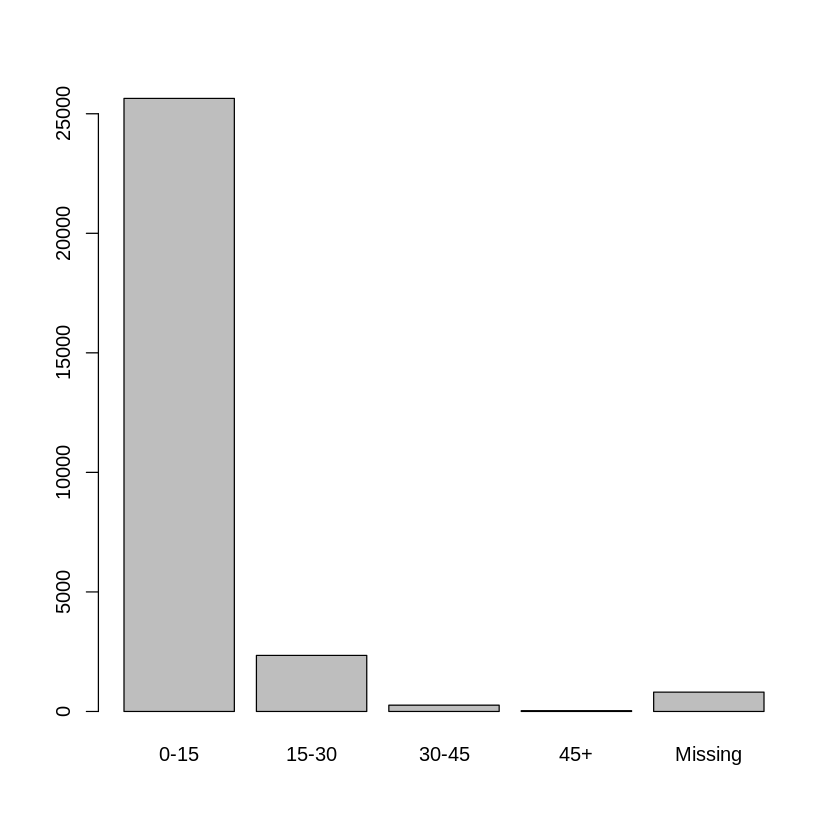

In [27]:
# Make the necessary replacements in the coarse classification example below 
loan_data$emp_cat <- rep(NA, length(loan_data$emp_length))

loan_data$emp_cat[which(loan_data$emp_length <= 15)] <- "0-15"
loan_data$emp_cat[which(loan_data$emp_length > 15 & loan_data$emp_length <= 30)] <- "15-30"
loan_data$emp_cat[which(loan_data$emp_length > 30 & loan_data$emp_length <= 45)] <- "30-45"
loan_data$emp_cat[which(loan_data$emp_length > 45)] <- "45+"
loan_data$emp_cat[which(is.na(loan_data$emp_length))] <- "Missing"

loan_data$emp_cat <- as.factor(loan_data$emp_cat)

# Look at your new variable using plot()
plot(loan_data$emp_cat)

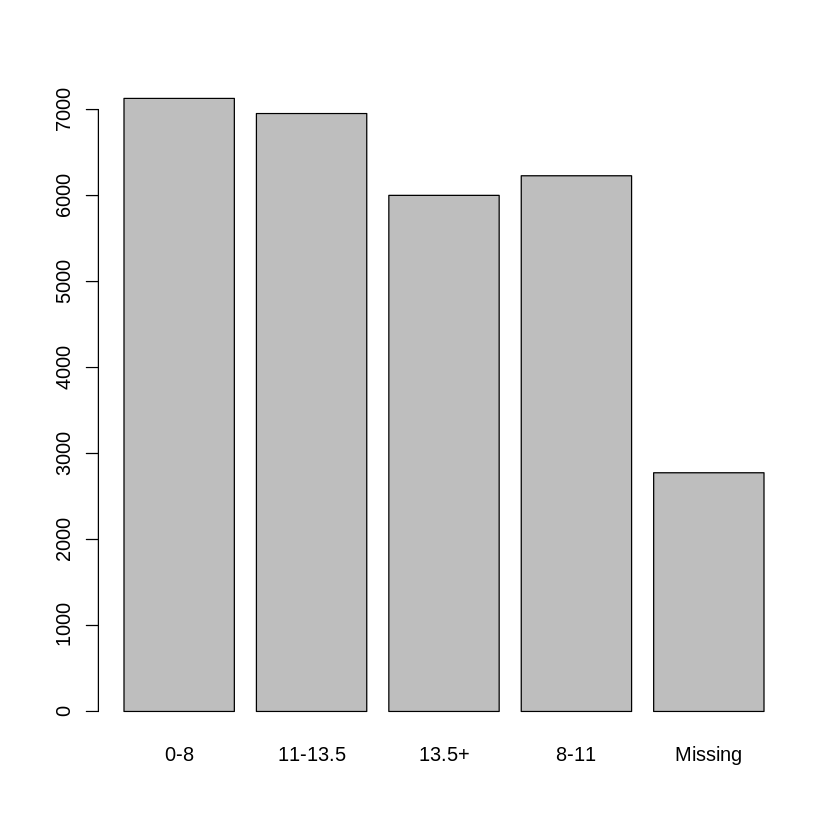

In [28]:
# Make the necessary replacements in the coarse classification example below 
loan_data$ir_cat <- rep(NA, length(loan_data$int_rate))

loan_data$ir_cat[which(loan_data$int_rate <= 8)] <- "0-8"
loan_data$ir_cat[which(loan_data$int_rate > 8 & loan_data$int_rate <= 11)] <- "8-11"
loan_data$ir_cat[which(loan_data$int_rate > 11 & loan_data$int_rate <= 13.5)] <- "11-13.5"
loan_data$ir_cat[which(loan_data$int_rate > 13.5)] <- "13.5+"
loan_data$ir_cat[which(is.na(loan_data$int_rate))] <- "Missing"

loan_data$ir_cat <- as.factor(loan_data$ir_cat)

# Look at your new variable using plot()
plot(loan_data$ir_cat)

###**Matrices de fractionnement et de confusion des données**

####**1. Matrices de fractionnement et de confusion des données**
+ ***Nous avons vu plusieurs techniques de prétraitement des données. Lorsque les données sont entièrement prétraitées, vous pouvez continuer et commencer votre analyse.***

####**2. Démarrer l’analyse**

+ Vous pouvez exécuter le modèle sur l’ensemble de l’ensemble de données et utiliser le même ensemble de données pour évaluer le résultat, mais cela conduira très probablement à un résultat trop optimiste.

####**3. Ensemble de formation et de test**
+ Une alternative consiste à diviser les données en deux parties. 

+ **La première partie des données, appelée ensemble d’apprentissage, peut être utilisée pour construire le modèle, et la deuxième partie des données, l’ensemble de test, peut être utilisée pour tester les résultats.**

####**4. Ensemble de formation et de test**
+ **Une façon courante de le faire consiste à utiliser les deux tiers des données pour un ensemble d’apprentissage et un tiers des données pour l’ensemble de test.** 

+ **Bien sûr, il peut y avoir beaucoup de variation dans l’estimation des performances, en fonction des deux tiers des données que vous sélectionnez pour l’ensemble d’entraînement.**

+ **Une façon de réduire cette variation consiste à utiliser la validation croisée.**

####**5. Validation croisée**
+ Pour l’exemple de l’ensemble d’entraînement des deux tiers et de l’ensemble de test d’un tiers, une variante de validation croisée ressemblerait à ceci. 

+ Les données seraient divisées en trois parties égales, et à chaque fois, deux de ces parties agiraient comme un ensemble d’apprentissage, et une partie agirait comme un ensemble de test. 

+ Bien sûr, nous pourrions utiliser autant de pièces que nous le voulions, mais nous devrions exécuter le modèle plusieurs fois si nous utilisions plusieurs pièces. 

+ Cela peut devenir lourd sur le plan informatique. 

+ Dans ce cours, nous n’utiliserons qu’un ensemble d’entraînement et un ensemble de test contenant respectivement deux tiers contre un tiers des données. 

+ Imaginez que nous venons d’exécuter un modèle, et maintenant nous appliquons le modèle à notre ensemble de tests pour voir à quel point les résultats sont bons.

####**6. Évaluer un modèle**

+ L’évaluation du modèle de risque de crédit consiste à comparer les résultats observés du défaut par rapport au non-défaut, stockés dans la variable loan_status de l’ensemble de tests, avec les résultats prévus selon le modèle. 

+ Si nous avons affaire à un grand nombre de prédictions, une méthode populaire pour résumer les résultats utilise ce qu’on appelle une matrice de confusion. 
+ Ici, nous utilisons seulement 14 valeurs pour démontrer le concept.

####**7. Évaluer un modèle**
+ Une matrice de confusion est un tableau de contingence des classifications correctes et incorrectes. 

+ Les classifications correctes sont sur la diagonale de la matrice de confusion. 

+ Nous voyons, par exemple, que huit non-défaillants ont été correctement classés comme non défaillants, et trois défaillants ont été correctement classés comme défaillants. 

+ Cependant, nous constatons que deux non-défaillants ont été classés à tort comme défaillants, et un défaillant a été classé à tort comme non-défaillant.

####**8. Évaluer un modèle**
+ **Les éléments sur les diagonales sont également appelés les vrais positifs et les vrais négatifs.** 
+ **Les diagonales hors diagonales sont appelées les faux positifs par rapport aux faux négatifs.**

####**9. Quelques mesures...**

+ Plusieurs mesures peuvent être dérivées de la matrice de confusion. 

+ **Nous discuterons de la précision de la classification, de la sensibilité et de la spécificité**. 

+ La précision de classification est le pourcentage d’instances correctement classées, ce qui est égal à 78 points 57 % dans cet exemple. 

+ La sensibilité est le pourcentage de mauvais clients qui sont classés correctement ou 75% dans cet exemple. 

+ La spécificité est le pourcentage de bons clients qui sont classés correctement ou 80% dans cet exemple.

####**10. Entraînons-nous!**
+ Entraînons-nous à diviser les données et à construire des matrices de confusion.

###**EXERCICES**

####**Fractionner l'ensemble de données**

+ ***Pour créer vos ensembles d'entraînement et de test, vous devez d'abord définir une graine à l'aide de set.seed(). Les graines vous permettent de créer un point de départ pour des nombres générés aléatoirement, de sorte qu'à chaque fois que votre code est exécuté, la même réponse est générée. L'avantage de le faire dans votre échantillonnage est que vous ou n'importe qui d'autre pouvez recréer exactement les mêmes ensembles d'apprentissage et de test en utilisant la même graine.***

+ **À l'aide de sample(), vous pouvez affecter de manière aléatoire des observations à l'ensemble d'apprentissage et de test.**

+ **Pour cet exercice, vous utiliserez les deux premiers arguments de la fonction sample() :**

  + **Le premier argument est le vecteur à partir duquel nous allons échantillonner les valeurs.**

  + **Nous choisirons au hasard des numéros de ligne comme indices ; vous pouvez utiliser 1:nrow(loan_data) pour créer le vecteur des numéros de lignes.**

  + **Le deuxième argument est le nombre d'éléments à choisir. Nous entrerons 2 / 3 * nrow(loan_data), car nous construisons d'abord l'ensemble d'apprentissage.**


#####**Instructions**

+ Définissez une graine de 567 à l'aide de la fonction set.seed().
+ Stockez les indices de ligne de l'ensemble d'apprentissage dans l'objet index_train. 
+ Utilisez la fonction sample() avec un premier et un deuxième argument comme indiqué ci-dessus.
+ Créez l'ensemble de formation en sélectionnant les numéros de ligne stockés dans index_train à partir de l'ensemble de données loan_data. 
+ Enregistrez le résultat dans training_set.
+ Le jeu de test contient les lignes qui ne sont pas dans index_train. 
+ Copiez le code que vous avez utilisé pour créer l'ensemble d'apprentissage, mais utilisez le signe négatif (-) juste avant index_train à l'intérieur des crochets. 
+ Enregistrez le résultat dans test_set.

In [29]:
# Set seed of 567
set.seed(567)

# Store row numbers for training set: index_train
index_train <- sample(1:nrow(loan_data), 2/3*nrow(loan_data))

# Create training set: training_set
training_set <- loan_data[index_train, ]

# Create test set: test_set
test_set <- loan_data[-index_train, ]

####**Créer une matrice de confusion**

+ ***Dans cet exemple, supposons que vous avez exécuté un modèle et stocké les résultats prévus dans un vecteur appelé model_pred. Vous voulez voir comment le modèle s'est comporté afin de construire une matrice de confusion. Vous comparerez la colonne de statut de prêt réel (loan_status) aux valeurs prédites (model_pred), en utilisant la fonction table(), où les arguments sont les valeurs vraies et les valeurs prédites. Rappelons la structure de la matrice de confusion :***

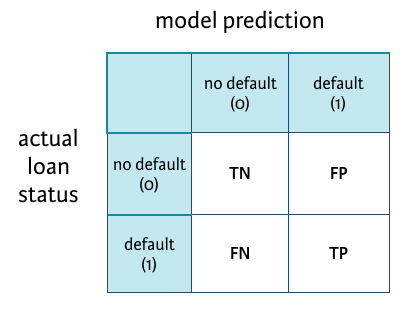

+ Et les formules:

  + $$\textrm{Classification accuracy} = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$

  + $$\textrm{Sensitivity} = \frac{TP}{(TP + FN)}$$

  + $$\textrm{Specificity} = \frac{TN}{(TN + FP)}$$


####**Instructions**

+ Créez une matrice de confusion en comparant la colonne loan_status dans test_set avec le vecteur model_pred. 
+ Vous pouvez utiliser la fonction table() avec deux arguments pour ce faire. Stockez la matrice dans l'objet conf_matrix.
+ Calculez la précision de la classification et imprimez le résultat. 
+ Vous pouvez soit sélectionner les éléments de matrice corrects dans la matrice de confusion à l'aide de conf_matrix, soit copier et coller les valeurs souhaitées.
+ Calculez la sensibilité et imprimez le résultat.

In [30]:
model_pred <- sample(c(0, 1), replace = TRUE, size = 9698)

In [31]:
# Create confusion matrix
conf_matrix <- table(test_set$loan_status, model_pred)
conf_matrix

   model_pred
       0    1
  0 4268 4341
  1  535  554

In [32]:
# Compute classification accuracy
(conf_matrix[1, 1] + conf_matrix[2, 2]) / (conf_matrix[1, 1] + conf_matrix[1, 2] + conf_matrix[2, 1] + conf_matrix[2, 2])

[1] 0.4972159

In [33]:
# Compute sensitivity
conf_matrix[2, 2] / (conf_matrix[2, 1] + conf_matrix[2, 2])

[1] 0.5087236

###**Régression logistique : introduction**

####**1. Régression logistique : introduction**

+ ***Félicitations! Nous avons maintenant prétraité les données. Nous avons éliminé les valeurs aberrantes, classé grossièrement la durée de l’emploi et le taux d’intérêt, et divisé les données en un ensemble de formation et un ensemble de tests.***

####**2. Structure finale des données**
+ Jetons un coup d’œil à la structure de l’ensemble d’entraînement. 

+ Rappelez-vous que loan_status est notre variable de réponse, et nous avons maintenant des variables à quatre facteurs et trois variables continues comme variables explicatives.

####**3. Qu’est-ce que la régression logistique ?**
+ Dans ce chapitre, nous discuterons de la régression logistique. 

+ Comme son nom l’indique, **la régression logistique est similaire à bien des égards à la régression linéaire, sauf que la sortie du modèle est une valeur comprise entre zéro et un.** 

+ Cela est nécessaire car nous sommes intéressés à prédire la probabilité de défaut, qui, par définition, est comprise entre zéro et un. 

+ Dans un modèle de régression logistique, la probabilité de défaut peut également être écrite comme la probabilité que le statut du prêt soit égal à un, conditionnelle aux variables $x_1$ à $x_m$, qui, dans le cas de notre ensemble de données, sont le montant du prêt, la note, l’âge, et cetera. 
+ De plus, certains paramètres $\beta_0$ à $\beta_m$ sont estimés. La combinaison des paramètres et des variables est appelée prédicteur linéaire.

####**4. Ajustement d’un modèle logistique dans R**

+ Vous pouvez ajuster un modèle de régression logistique et obtenir les estimations de paramètres dans R en utilisant la fonction glm(), qui signifie modèle linéaire généralisé, avec l’argument de famille égal à « binôme ». 

+ Regardons un exemple dans lequel nous n’incluons que la variable âge comme prédicteur. 

+ Lorsque nous examinons le résultat, nous obtenons des coefficients et des diagnostics de modèle. 

+ Pour l’instant, nous allons nous concentrer sur les coefficients. L’interception est l’estimation pour $\beta_ 0$, et la valeur mineure est l’estimation pour $\beta_1$. 

+ Alors, comment interprétons-nous ces chiffres? Pour répondre à cette question, nous prenons d’abord du recul et faisons quelques calculs de base.

####**5. Probabilités de défaut**
+ Vous avez vu l’expression pour la probabilité de défaut. 

+ En multipliant cette expression par la fonction exponentielle du prédicteur linéaire au numérateur et au dénominateur, nous obtenons ce résultat. 

+ La probabilité que le loan_status soit égal à zéro, ou la probabilité de non-défaut, est donnée par un moins la probabilité de défaut. 

+ La réécriture de l’expression donne ce résultat. Maintenant, si nous divisons la probabilité de défaut par la probabilité de non-défaut, nous obtenons les chances en faveur du défaut. 

+ Idéalement, cela est simplement égal à la fonction exponentielle de notre prédicteur linéaire. Maintenant, comment interprétons-nous cela?

####**6. Interprétation du coefficient**

+ Supposons que la valeur de la variable $x_j$ augmente d’une unité, tandis que toutes les autres variables restent égales. 

+ Si cela se produit, les chances de défaut seront multipliées par l’exponentielle de $\beta_j$. 

+ Notez que les chances diminueront pour augmenter $x_j$ lorsque $\beta_j$ est négatif, et les chances augmenteront pour augmenter $x_j$ lorsque $\beta_j$ est positif. 

+ En revenant au modèle de régression logistique que nous avons construit, nous voyons que le coefficient d’âge est négatif point-009726. 

+ Si l’âge augmente d’une unité, les chances de défaut seront multipliées par environ le point 991. 

+ Cela signifie qu’une année supplémentaire réduit la probabilité de défaut de paiement de près d’un pour cent.

####**7. Entraînons-nous!**
+ Maintenant, entraînons-nous!

###**EXERCICES**

####**Régression logistique de base**

+ ***Dans la vidéo, vous avez examiné un modèle de régression logistique incluant la variable âge comme prédicteur. Vous allez maintenant inclure une variable catégorielle et apprendre à interpréter ses estimations de paramètres.***

+ *Lorsque vous incluez une variable catégorielle dans un modèle de régression logistique dans R, vous obtenez une estimation de paramètre pour toutes ses catégories sauf une. Cette catégorie pour laquelle aucune estimation de paramètre n'est donnée est appelée la catégorie de référence. Le paramètre de chacune des autres catégories représente l'odds ratio en faveur d'un défaut de paiement entre la catégorie d'intérêt et la catégorie de référence. Ne vous inquiétez pas si cela n'a pas encore de sens pour vous, vous ferez plus d'exercices à ce sujet plus tard !*

####**Instructions**

+ Construisez un modèle de régression logistique appelé log_model_cat avec la variable catégorielle ir_cat comme seul prédicteur. Votre appel à glm() doit contenir trois arguments :
  + loan_status ~ ir_cat
  + family = "binomial"
  + data = training_set
+ Affichez le résultat dans la console pour voir vos estimations de paramètres.
+ Découvrez quelle est la catégorie de référence en examinant à nouveau la structure de ir_cat (dans l'ensemble de données complet loan_data). Utilisez la fonction table() pour cela.

In [34]:
loan_data <- readRDS("/content/loan_data_ch2.rds")

In [35]:
# Set seed of 567
set.seed(567)

# Store row numbers for training set: index_train
index_train <- sample(1:nrow(loan_data), 2 / 3 * nrow(loan_data))

# Create training set: training_set
training_set <- loan_data[index_train, ]

# Create test set: test_set
test_set <- loan_data[-index_train, ]

In [36]:
# Build a glm model with variable ir_cat as a predictor
log_model_cat <- glm(loan_status ~ ir_cat, family = "binomial", data = training_set)

# Print the parameter estimates 
log_model_cat


Call:  glm(formula = loan_status ~ ir_cat, family = "binomial", data = training_set)

Coefficients:
  (Intercept)  ir_cat11-13.5    ir_cat13.5+     ir_cat8-11  ir_catMissing  
      -2.8893         0.9849         1.3805         0.5496         0.7225  

Degrees of Freedom: 19393 Total (i.e. Null);  19389 Residual
Null Deviance:	    13440 
Residual Deviance: 13030 	AIC: 13040

In [37]:
# Look at the different categories in ir_cat using table()
table(loan_data$ir_cat)


    0-8 11-13.5   13.5+    8-11 Missing 
   7130    6953    6002    6230    2776 

####**Interpréter les probabilités d'une variable catégorielle**

+ ***L'objet log_model_cat est toujours chargé dans votre espace de travail. Revoyez à nouveau les estimations des paramètres. Comment interprétez-vous l'estimation des paramètres pour les taux d'intérêt qui se situent entre 8 % et 11 % ? Vous pouvez utiliser la console pour effectuer des calculs de base (si nécessaire). Par rapport à la catégorie de référence avec des taux d'intérêt entre 0% et 8%, les probabilités en faveur du défaut changent d'un multiple de…***

+ *Vous pouvez accéder à vos coefficients en utilisant $coefficients après le nom de votre modèle.*

####**Instructions**

+ 0,541

+ -0,541

+ ***1.718***

+ 0,582

####**Variables multiples dans un modèle de régression logistique**

+ ***L'interprétation d'un seul paramètre est toujours valable lors de l'inclusion de plusieurs variables dans un modèle. Lorsque vous incluez plusieurs variables et demandez l'interprétation lorsqu'une certaine variable change, on suppose que les autres variables restent constantes ou inchangées. Il y a une expression latine fantaisiste pour cela, ceteris paribus, signifiant littéralement "garder tous les autres pareils".***

+ **Pour créer un modèle de régression logistique avec plusieurs variables, vous pouvez utiliser le signe + pour ajouter des variables. Votre formule ressemblera à quelque chose comme :**

  + y ~ $x_1 + ... + x_k$


+ *Afin d'évaluer le modèle, il y a un certain nombre de choses à savoir. Vous avez déjà regardé les valeurs des paramètres, mais ce n'est pas la seule chose importante. La signification statistique d'une certaine estimation de paramètre est également importante. La signification d'un paramètre est souvent appelée valeur p, mais dans une sortie de modèle, vous la verrez notée Pr(>|t|). Dans glm, la signification légère est indiquée par un "." à très forte signification notée "***". Lorsqu'un paramètre n'est pas significatif, cela signifie que vous ne pouvez pas garantir que ce paramètre est significativement différent de 0. La signification statistique est importante. En général, il n'est logique d'interpréter l'effet sur le défaut que pour les paramètres significatifs.*

####**Instructions**

+ Créez un modèle de régression logistique à l'aide de la fonction glm() et de training_set. 
+ Incluez les variables age, ir_cat, grade, loan_amnt et annual_inc. 
+ Appelez ce modèle log_model_multi.
+ Obtenez les niveaux de signification en utilisant summary() en combinaison avec notre modèle. 
+ Vous approfondirez la signification des niveaux de signification dans le prochain exercice !

In [38]:
# Build the logistic regression model
log_model_multi <- glm(loan_status ~ age + ir_cat + grade + loan_amnt + annual_inc, 
                      family = "binomial", 
                      data = training_set)


# Obtain significance levels using summary()
summary(log_model_multi)


Call:
glm(formula = loan_status ~ age + ir_cat + grade + loan_amnt + 
    annual_inc, family = "binomial", data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1799  -0.5321  -0.4329  -0.3342   3.4786  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.400e+00  1.273e-01 -18.851  < 2e-16 ***
age           -2.505e-03  3.815e-03  -0.657 0.511375    
ir_cat11-13.5  7.048e-01  1.319e-01   5.345 9.06e-08 ***
ir_cat13.5+    7.012e-01  1.466e-01   4.784 1.72e-06 ***
ir_cat8-11     4.624e-01  1.159e-01   3.992 6.57e-05 ***
ir_catMissing  4.587e-01  1.285e-01   3.571 0.000356 ***
gradeB         1.108e-01  1.049e-01   1.056 0.290875    
gradeC         4.542e-01  1.209e-01   3.757 0.000172 ***
gradeD         7.549e-01  1.373e-01   5.497 3.85e-08 ***
gradeE         8.481e-01  1.662e-01   5.103 3.34e-07 ***
gradeF         1.484e+00  2.326e-01   6.381 1.75e-10 ***
gradeG         1.954e+00  3.331e-01   5.866 4.47e-09 ***
l

####**Interprétation des niveaux de signification**

+ ***Examinez les niveaux de signification de votre dernier modèle log_model_multi, qui est chargé dans l'espace de travail. Parcourez à nouveau le résumé (). Laquelle des citations suivantes est correcte ? Les estimations des paramètres pour loan_amount et annual_inc sont…***

####**Instructions**

+ Tous deux d'une ampleur si faible (ordre -6), qu'aucun d'eux n'est statistiquement significatif.

+ Tous deux d'une très faible ampleur (ordre -6), les deux sont néanmoins statistiquement significatifs.

+ ***Cependant, du même ordre, annual_inc est statistiquement significatif alors que loan_amount ne l'est pas.***

+ Cependant, du même ordre, loan_amount est statistiquement significatif là où annual_inc ne l'est pas.

###** Régression logistique : prédire la probabilité de défaut**

####**1. Régression logistique : prédire la probabilité de défaut**

+ ***Vous avez maintenant appris à construire un modèle de régression logistique. Mais bien sûr, vous aimeriez savoir comment utiliser le modèle obtenu et ses estimations de paramètres pour calculer des estimations de la probabilité de défaut pour les cas de jeu de test. Les prédictions de l’ensemble de tests peuvent être comparées à leurs résultats réels (par défaut ou non), ce qui est nécessaire pour valider le modèle.***

####**2. Un exemple avec « âge » et « accession à la propriété »**

+ Pour vous guider à travers ce principe, regardons un exemple assez simple, contenant des variables d’âge et de home_ownership. 

+ Les estimations des paramètres ont été obtenues à l’aide de l’ensemble d’entraînement de nos données de prêt. 

+ En utilisant la formule discutée dans la vidéo précédente et les estimations de paramètres, nous pouvons maintenant calculer une probabilité de défaut en utilisant les valeurs de covariables des cas qui se trouvent dans l’ensemble de tests. 

+ Encore une fois, notez que nous avons une estimation de paramètre pour chacune des catégories de la variable catégorielle, sauf une pour la catégorie de référence, qui est la catégorie d’accession à la propriété HYPOTHÈQUE dans ce modèle.

####**3. Exemple d’ensemble de tests**
+ Prenons un exemple précis. 

+ Le client sur la première ligne de l’ensemble de test est âgé de 33 ans et locataire. 

+ En utilisant le modèle à portée de main, vous pouvez calculer la probabilité de défaut comme ceci. 

+ Les bêta 2 et bêta 3, qui appartiennent respectivement aux catégories « autre » et « propriétaire » pour l’accession à la propriété, sont chacune multipliées par zéro. 

+ En branchant les autres estimations de paramètres, nous obtenons une probabilité de défaut de 11,56% pour ce client spécifique.

####**4. Faire des prédictions dans R**
+ Alors, comment cela fonctionne-t-il dans R? 

+ Vous pouvez utiliser la fonction predict pour prédire la probabilité de défaut pour un ou plusieurs cas d’ensemble de tests. 

+ Commençons par sélectionner le premier cas de l’ensemble de test. 

+ Que vous utilisiez un ou plusieurs cas, vous devez toujours vous assurer que les cas de test sont stockés dans un bloc de données. Explorons ce cas de test. 

+ L’âge est 33 ans et home_ownership catégorie est RENT. 

+ En utilisant la fonction predict(), le premier argument contient le modèle ajusté. 

+ Dans le deuxième argument, vous fournissez les nouvelles données dans test_case. 

+ En faisant cela, vous obtenez un résultat de -2,03499. 

+ Ce n’est pas encore la probabilité ajustée de défaut, mais le prédicteur linéaire. 

+ En remplaçant l’argument type par « response », vous obtenez la probabilité réelle de défaut prévue pour ce client.

####**5. Entraînons-nous!**
+ Maintenant, faisons quelques prédictions!

###**EXERCICES**

####**Prédire la probabilité de défaut**
+ ***Dans la vidéo, vous avez examiné la probabilité de défaut prévue pour un cas dans l'ensemble de test. Heureusement, vous pouvez prédire la probabilité pour tous les cas d'ensemble de test à la fois en utilisant la fonction predict ().***

+ *Après avoir obtenu toutes les prédictions pour les éléments de l'ensemble de test, il est utile d'avoir une première idée de la capacité de discrimination du modèle en examinant la plage des probabilités prédites. Une petite plage signifie que les prédictions pour les cas de l'ensemble de tests ne sont pas très éloignées et que, par conséquent, le modèle peut ne pas être très efficace pour distinguer les bons des mauvais clients. Avec de faibles pourcentages de défaut, vous remarquerez qu'en général, de très faibles probabilités de défaut sont prédites. Il est temps de jeter un œil à un premier modèle.*

+ *log_model_small est chargé dans l'espace de travail.*

####**Instructions**

+ Le code pour la prédiction de test_case dans la vidéo est copié dans votre espace de travail. 
+ Modifiez le code de sorte que la fonction predict() soit appliquée à tous les cas dans test_set. 
+ Vous pouvez les stocker dans l'objet predictions_all_small.
+ Obtenez une première idée de la façon dont le modèle peut discriminer en utilisant range()

In [39]:
log_model_small <- glm(formula = loan_status ~ age + ir_cat, family = "binomial", data = training_set)

In [40]:
# Make PD-predictions for all the test set elements using the "log_model_small" logistic regression model
predictions_all_small <- predict(log_model_small, newdata = test_set, type = "response")

# Look at the range of the object "predictions_all_small"
range(predictions_all_small)

[1] 0.03853433 0.18866941

####**Faire des modèles plus discriminants**
+ ***Dans l'exercice précédent, la fourchette des probabilités de défaut prédites était plutôt étroite. Comme indiqué, il faut s'attendre à de petites probabilités de défaut prédites avec de faibles taux de défaut, mais la construction de modèles plus grands (ce qui signifie essentiellement : inclure plus de prédicteurs) peut élargir la plage de vos prédictions.***

+ *La question de savoir si cela conduira éventuellement à de meilleures prédictions doit encore être validée et dépend de la qualité des prédicteurs nouvellement inclus. Mais d'abord, regardez comment des modèles plus grands peuvent élargir la gamme.*

####**Instructions**

+ Créez log_model_full comme vous l'avez fait pour log_model_small, mais cette fois, incluez tous les prédicteurs disponibles dans l'ensemble de données. 
+ Si vous ne voulez pas taper le nom de chaque colonne séparément, vous pouvez simplement sélectionner toutes les variables en utilisant loan_status ~ .
+ Créez votre vecteur de prédiction predicts_all_full pour tous les cas du jeu de test à l'aide de predict(). 
+ Notez que ces valeurs représentent la probabilité de défaut.
+ Regardez la gamme des prédictions.

In [41]:
# Change the code below to construct a logistic regression model using all available predictors in the data set
log_model_full <- glm(loan_status ~ ., family = "binomial", data = training_set)

# Make PD-predictions for all test set elements using the the full logistic regression model
predictions_all_full <- predict(log_model_full, newdata = test_set, type = "response")

# Look at the predictions range
range(predictions_all_full)

[1] 6.471741e-06 5.436561e-01

###**Évaluation du résultat du modèle de régression logistique**

####**1. Évaluation du résultat du modèle de régression logistique**
+ ***Maintenant que vous avez appris à prédire les probabilités de défaut, il est temps d’évaluer le résultat.***

####**2. Récapitulatif : évaluation du modèle**
+ En utilisant les probabilités prédites, vous aimeriez faire une matrice de confusion. 
+ Comme vous l’avez vu dans le premier chapitre, vous pouvez créer une matrice de confusion comparant la colonne loan_status de l’ensemble de tests avec les prédictions du modèle pour l’état du prêt.

####**3. En réalité...**
+ Le problème est qu’une probabilité prédite de défaut se situe quelque part entre zéro et un. 
+ Comment allons-nous faire une matrice de confusion maintenant?

####**4. En réalité...**
+ La réponse réside dans la spécification d’une valeur seuil ou d’une limite. 
+ Nous devrons déterminer une valeur comprise entre 0 et 1, et si la valeur prédite est supérieure à cette valeur, la prédiction est définie sur 1; Si ce n’est pas le cas, la prédiction est définie sur 0.

####**5. Coupure = 0,5**
+ Une valeur de coupure logique pourrait être le point 5: si les chances sont plus en faveur du défaut, ou plus grandes que le point 5, la prédiction est définie sur 1, sinon, elle est mise à zéro.

####**6. Coupure = 0,5**
+ Jetons un coup d’œil à la matrice de confusion pour le sous-ensemble de ces 14 cas. 
+ En regardant ce petit sous-ensemble, il devient clair que ce seuil ne conduira à aucun défaut prédit, ce qui donne une colonne tout zéro ici. 
+ Nous avons donc une sensibilité de 0%, aucun des défauts réels n’étant correctement classé. 
+ Comme vous l’avez vu dans les exercices précédents, il n’est pas rare d’avoir des probabilités de défaut prédites plutôt faibles, car le défaut de paiement des prêts est un événement rare. 
+ Par conséquent, il faut faire preuve de prudence lorsqu’on décide d’une valeur de seuil, et pas simplement la régler au point 5.

####**7. Coupure = 0,1**
+ Jetons un coup d’œil à la matrice de confusion pour un point de coupure-1. 
+ Ce résultat conduit à une sensibilité nettement meilleure, alors que la précision de la classification ne change pas.

####**8. Entraînons-nous!**
+ Expérimentons avec quelques valeurs de coupure!

####**Spécification d'un seuil**

+ ***Nous vous avons montré comment la spécification d'un seuil peut faire la différence pour obtenir une bonne matrice de confusion. Maintenant, vous allez apprendre à transformer le vecteur de prédiction en un vecteur de valeurs binaires indiquant le statut du prêt. La fonction ifelse() dans R peut vous aider ici.***

+ **En appliquant la fonction ifelse() dans le contexte d'une coupure, vous auriez quelque chose comme**

      ifelse(predictions > 0.3, 1, 0)

+ *Dans le premier argument, vous testez si une certaine valeur dans le vecteur de prédictions est supérieure à 0,3. Si c'est TRUE, R renvoie "1" (spécifié dans le deuxième argument), si FALSE, R renvoie "0" (spécifié dans le troisième argument), représentant respectivement "default" et "no default".*

####**Instructions**

+ Le code du modèle de régression logistique complet ainsi que le vecteur de prédictions sont fournis dans votre console.
+ En utilisant un seuil de 0,15, créez le vecteur pred_cutoff_15 à l'aide de la fonction ifelse() et de predicts_all_full.
+ Regardez la matrice de confusion en utilisant table() (entrez les vraies valeurs, donc test_set$loan_status, dans le premier argument).


In [42]:
# The code for the logistic regression model and the predictions is given below
log_model_full <- glm(loan_status ~ ., family = "binomial", data = training_set)
predictions_all_full <- predict(log_model_full, newdata = test_set, type = "response")

# Make a binary predictions-vector using a cut-off of 15%
pred_cutoff_15 <- ifelse(predictions_all_full > 0.15, 1, 0)

# Construct a confusion matrix
table(test_set$loan_status, pred_cutoff_15)

   pred_cutoff_15
       0    1
  0 6726 1878
  1  683  410

####**Comparer deux seuils**

+ ***Examinez à nouveau la matrice de confusion utilisant le modèle complet et une coupure de 15 %, qui est stockée dans l'objet conf_matrix_15, et une autre matrice de confusion utilisant une coupure de 20 % et le même modèle, stockée dans conf_matrix_20. Laquelle des affirmations suivantes est vraie? Rappel:***

 + $$\textrm{Classification accuracy} = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$

 + $$\textrm{Sensitivity} = \frac{TP}{(TP + FN)}$$

 + $$\textrm{Specificity} = \frac{TN}{(TN + FP)}$$

 
+ *Passer d'un seuil de 15% à 20%…*

####**Instructions**


+ ***La précision augmente, la sensibilité diminue et la spécificité augmente.***

+ La précision augmente, la sensibilité augmente et la spécificité diminue.

+ La précision augmente et la sensibilité et la spécificité diminuent.

+ La précision diminue et la sensibilité et la spécificité augmentent.

###**Récapitulation et remarques**

####**1. Récapitulation et remarques**

+ ***Vous avez maintenant appris à construire un modèle de régression logistique et à évaluer le résultat par le choix d’une limite. Avant de terminer ce chapitre, j’aimerais faire deux remarques supplémentaires.***

####**2. Meilleur seuil pour la précision?**
+ La première remarque porte sur le choix d’une valeur seuil « optimale », et la seconde est une remarque plus générale sur les modèles de régression logistique. 

+ Voyons comment la précision de la classification change avec différentes valeurs seuils pour notre modèle de régression logistique complet.

####**3. Meilleur seuil pour la précision?**
+ Il y a une forte augmentation de la précision jusqu’à une coupure d’environ 25%,

#####**4. Meilleur seuil pour la précision?**
+ Après cela, il y a une légère augmentation jusqu’à un seuil de 51%, et

###**5. Meilleur seuil pour la précision?**
+ Pour tous les seuils supérieurs à 51%, la précision ne change plus. 

+ Il est important de souligner que la nature croissante de la précision à mesure que le seuil augmente est un résultat très typique pour la modélisation du risque de crédit, ou en général, tout type de modèle de régression logistique avec des groupes déséquilibrés (beaucoup plus de uns que de zéros, ou l’inverse). 

+ En regardant la précision seule, vous seriez tenté d’utiliser une valeur seuil de plus de 51% ici, car cela conduit à la meilleure précision.

####**6. Meilleur seuil pour la précision?**
+ Comme indiqué précédemment, cependant, la grande précision n’est due qu’au fait que pour un seuil supérieur à 51%, tous les cas sont classés comme non par défaut.

####**7. Qu’en est-il de la sensibilité ou de la spécificité?**
+ Jetons maintenant un coup d’œil à la sensibilité et à la spécificité. Contrairement à la précision, la nature strictement croissante pour la spécificité et la nature strictement décroissante pour la sensibilité s’appliquent en général.

####**8. Qu’en est-il de la sensibilité ou de la spécificité?**
+ En prenant un seuil de 0, tous les cas seront classés comme défauts, ce qui conduira à une sensibilité de 100%, mais une spécificité de 0.

####**9. Qu’en est-il de la sensibilité ou de la spécificité?**
+ À l’autre extrême, en prenant un seuil de 1, tous les cas seront classés comme non par défaut, ce qui conduira à une spécificité de 100% mais à une sensibilité de 0. 
+ Ce compromis entre sensibilité et spécificité existe toujours. 
+ Nous reviendrons sur la spécification d’une coupure dans le quatrième chapitre de ce cours.

####**10. À propos de la régression logistique...**
+ Pour finaliser ce chapitre, j’aimerais mentionner que le modèle de régression logistique que nous avons utilisé jusqu’à présent est également connu sous le nom de modèle de régression logistique avec un lien logit, qui est la valeur par défaut dans R, mais peut également être écrit en utilisant un lien égal à « logit ». À l’aide de l’expression située au bas de la diapositive, vous pouvez ensuite calculer la probabilité de défaut.

####**11. Autres modèles de régression logistique**
+ Des alternatives existent, telles que les fonctions de liaison probit et cloglog. 
+ Bien que je ne discuterai pas de ces variations en détail, elles méritent d’être mentionnées. 
+ Comme indiqué ici, les estimations de paramètres négatifs pour ces modèles entraînent également une diminution de la probabilité de défaut et les estimations de paramètres positifs entraînent une augmentation de la probabilité de défaut. 
+ Cependant, la fonction décrivant la relation entre les estimations des paramètres et les probabilités réelles de défaut change et est légèrement plus complexe. Néanmoins, les prédictions sont encore très faciles à obtenir en utilisant R.

####**12. Entraînons-nous!**
+ Maintenant, terminons ce chapitre avec quelques exercices!

####**Comparaison des fonctions de liaison pour une coupure donnée**
+ ***Dans ce dernier exercice, vous allez ajuster un modèle en utilisant chacune des trois fonctions de lien (logit, probit et cloglog), faire des prédictions pour l'ensemble de test, classer les prédictions dans le groupe approprié (par défaut versus non par défaut) pour une coupe donnée -off, créez une matrice de confusion et calculez la précision et la sensibilité de chacun des modèles compte tenu de la valeur seuil ! Wow, vous avez beaucoup appris jusqu'à présent. Et enfin, vous tenterez d'identifier le modèle le plus performant en termes de précision compte tenu de la valeur seuil !***

+ *Il est important de savoir que les différences entre les modèles seront généralement très faibles, et encore une fois, les résultats dépendront de la valeur seuil choisie. Le résultat observé (par défaut ou non par défaut) est stocké dans true_val dans la console.*

####**Instructions**

+ Ajuster trois modèles de régression logistique en utilisant respectivement les liens logit, probit et cloglog. Une partie du code est donnée. Utilisez age, emp_cat, ir_cat et loan_amnt comme prédicteurs.
Faites des prédictions pour tous les modèles à l'aide de test_set.
+ Utilisez une valeur seuil de 14 % pour faire des prédictions pour chacun des modèles, de sorte que leurs performances puissent être évaluées.
+ Faire une matrice de confusion pour les trois modèles.
+ Enfin, calculez la précision de la classification pour les trois modèles.

In [48]:
# Fit the logit, probit and cloglog-link logistic regression models
log_model_logit <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                       family = binomial(link = logit), data = training_set)
log_model_probit <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                        family =  binomial(link = probit), data = training_set)
log_model_cloglog <- glm(loan_status ~ age + emp_cat + ir_cat + loan_amnt,
                         family = binomial(link = cloglog), data = training_set)

# Make predictions for all models using the test set
predictions_logit <- predict(log_model_logit, newdata = test_set, type = "response")
predictions_probit <- predict(log_model_probit, newdata = test_set, type = "response")
predictions_cloglog <- predict(log_model_cloglog, newdata = test_set, type = "response")

In [49]:
# Use a cut-off of 14% to make binary predictions-vectors
cutoff <- 0.14
class_pred_logit <- ifelse(predictions_logit > cutoff, 1, 0)

In [50]:
class_pred_probit <- ifelse(predictions_probit > cutoff, 1, 0)

In [51]:
class_pred_cloglog <- ifelse(predictions_cloglog  > cutoff, 1, 0)

In [52]:
# Make a confusion matrix for the three models
true_val <- test_set$loan_status
tab_class_logit <- table(true_val, class_pred_logit)
tab_class_logit

        class_pred_logit
true_val    0    1
       0 6666 1938
       1  695  398

In [53]:
tab_class_probit <- table(true_val, class_pred_probit)
tab_class_probit

        class_pred_probit
true_val    0    1
       0 6654 1950
       1  692  401

In [54]:
tab_class_cloglog <- table(true_val, class_pred_cloglog)
tab_class_cloglog

        class_pred_cloglog
true_val    0    1
       0 6674 1930
       1  697  396

In [55]:
# Compute the classification accuracy for all three models
acc_logit <- sum(diag(tab_class_logit)) / nrow(test_set)
acc_logit

[1] 0.7284727

In [56]:
acc_probit <- sum(diag(tab_class_probit)) / nrow(test_set)
acc_probit

[1] 0.7275446

In [57]:
acc_cloglog <- sum(diag(tab_class_cloglog)) / nrow(test_set)
acc_cloglog

[1] 0.7290915

###**Qu’est-ce qu’un arbre de décision ?**

####**1. Qu’est-ce qu’un arbre de décision ?**
+ ***Une autre façon de classer les clients en groupes de valeurs par défaut et non par défaut consiste à utiliser des arbres de décision. L’une des principales raisons de la popularité des arbres de décision est leur intelligibilité.***

####**2. Exemple d’arbre de décision**
+ Voici un exemple d’arbre. 
+ ***En répondant aux questions du haut (ou de la RACINE) de l’arborescence en passant par le bas (ou les nœuds feuilles), une décision est prise quant à savoir s’il faut classer une certaine instance comme cas par défaut ou non.***
+ Il existe plusieurs packages dans R pour construire automatiquement des arbres de décision.

####**3. Comment prendre une décision de fractionnement?**
+ Avant de le faire, j’aimerais expliquer comment une soi-disant « décision de scission » est prise. 

+ **Pour chaque nœud de l’arbre, la décision de division affectera la structure finale de l’arbre**. 

+ Examinons deux décisions de fractionnement possibles pour la variable catégorielle. 

+ Comment décidons-nous si la question posée devrait être de savoir si quelqu’un, disons, loue une maison ou non, OU si quelqu’un loue une maison ou appartient à la catégorie « autre », ou non?

####**4. Comment prendre une décision de fractionnement?**
+ Pour une variable continue (disons l’âge), comment définir la valeur seuil pour l’âge qui définit la limite entre une valeur par défaut ou non ? La réponse peut être trouvée dans la définition d’une mesure pour l’impureté. 

+ En bref, vous souhaitez minimiser les impuretés dans chaque nœud de l’arbre. 
+ **Une mesure populaire (et la mesure par défaut pour les impuretés dans le package de pièce populaire) est la mesure de Gini.** 
+ Prenons un exemple.

####**5. Exemple**
+ Supposons que vous disposez d’un ensemble d’apprentissage avec 500 cas, 250 cas par défaut et 250 non-défauts.

###**6. Exemple**
+  Vous verrez souvent le nombre de cas dans chaque nœud représenté comme ceci, avec le nombre réel de non-défauts sur le côté gauche,

####**7. Exemple**
+ et le nombre réel de défauts sur le côté droit. Bien sûr

####**8. Exemple**
+ Le scénario idéal, bien qu’irréaliste, conduirait à une répartition parfaite entre les défauts et les non-défauts à l’âge de 40 ans. 

####**9. Exemple**
+ Comme ce n’est pas le cas, calculons l’impureté à l’aide de la mesure de Gini. 
+ L’impureté dans un certain nœud selon la mesure de Gini est donnée par deux fois la proportion de non-défauts dans un nœud, multipliée par la proportion de défauts dans ce nœud. 
+ En appliquant cette formule au nœud racine, cela conduit à une impureté de 0,5 (qui est la quantité maximale possible, avec exactement autant de valeurs par défaut que de non-valeurs par défaut), une impureté de point-4664 dans le nœud gauche et une impureté de point-4536 dans le nœud droit. Une mesure importante est le gain de pureté obtenu en allant du nœud racine aux deux nœuds $N1$ et $N2$.

####**10. Exemple**
+ Ce gain peut être calculé en soustrayant les mesures de Gini pondérées dans les nœuds $N1$ et $N2$ de la mesure de Gini dans la racine. 
+ Dans notre exemple, cela conduit à un gain de près de 0,04. L’algorithme sélectionne la division qui conduit au gain le plus élevé.

####**11. Entraînons-nous!**
+ Maintenant, entraînons-nous!

###**EXERCICES**

####**Calcul du gain pour un arbre**

+ ***Dans la vidéo, vous avez vu comment la mesure Gini est utilisée pour créer la division parfaite pour un arbre. Maintenant, vous allez calculer le gain pour l'arbre chargé dans votre espace de travail.***

+ L'ensemble de données contient 500 cas, 89 de ces cas sont des valeurs par défaut. 

+ Cela a conduit à un Gini de 0,292632 dans le nœud racine. 

+ Pour rappel, rappelons que Gini d'un certain nœud = 2 * proportion de défauts dans ce nœud * proportion de non-défauts dans ce nœud. Jetez un œil au code pour un rappel.
      gini_root <- 2 * (89 / 500) * (411 / 500)

+ Vous utiliserez ces mesures de Gini pour vous aider à calculer le gain des nœuds feuilles par rapport au nœud racine. Regardez le code suivant pour avoir une idée de la façon dont vous pouvez utiliser les mesures de Gini que vous avez créées pour calculer le gain d'un nœud.

      Gain = gini_root - (prop(cases left leaf) * gini_left) - (prop(cases right leaf * gini_right))

+ *Calculez le Gini dans le nœud gauche et le nœud droit, et le gain des deux nœuds feuilles par rapport au nœud racine. L'objet contenant l'arbre est small_tree.*

####**Instructions**

+ Le calcul du Gini du nœud racine est donné.

+ Calculez la mesure de Gini pour le nœud feuille gauche.

+ Calculez la mesure de Gini pour le nœud feuille droit.

+ Calculez le gain en prenant la différence entre le nœud racine Gini et les mesures pondérées du nœud feuille Gini.

+ Les informations concernant la division dans cet arbre peuvent être trouvées en utilisant $split et l'objet arbre, small_tree. 

+ Au lieu de gain, vous devriez regarder la colonne d'amélioration ici. 

+ améliorer est une métrique alternative pour le gain, simplement obtenue en multipliant le gain par le nombre de cas dans l'ensemble de données. 

+ Assurez-vous que l'objet Improve (code donné) a la même valeur que dans small_tree$split.

In [58]:
# The Gini-measure of the root node is given below
gini_root <- 2 * 89 / 500 * 411 / 500
gini_root

[1] 0.292632

In [59]:
# Compute the Gini measure for the left leaf node
gini_ll <- 2 * (401/446)*(45/446) 
gini_ll

[1] 0.1814334

In [60]:
# Compute the Gini measure for the right leaf node
gini_rl <- 2 * (10/54)*(44/54) 
gini_rl

[1] 0.3017833

In [61]:
# Compute the gain
gain <- gini_root - 446 / 500 * gini_ll - 54 / 500 * gini_rl
gain

[1] 0.09820084

In [63]:
# compare the improve-column in small_tree$splits with our computed gain, multiplied by 500, and assure they are the same
small_set <- read.table("/content/small_set.txt")
head(small_set)

,status,age
,<int>,<int>
1,0,48
2,0,36
3,0,35
4,0,33
5,0,46
6,1,24


In [64]:
small_tree <- rpart(formula = status ~ age, data = small_set, method = "class", 
    control = rpart.control(minsplit = 5, cp = 0.001, maxdepth = 1))

In [65]:
small_tree$splits

,count,ncat,improve,index,adj
age,500,1,49.10042,32.5,0


In [66]:
improve <- gain * 500
improve

[1] 49.10042

####**Changer un Gini...**
+ ***Examinons le même arbre de décision. Comment un changement dans les proportions des feuilles droites de 10/44 à 20/34 changerait-il le gain calculé dans l'exercice précédent ?***

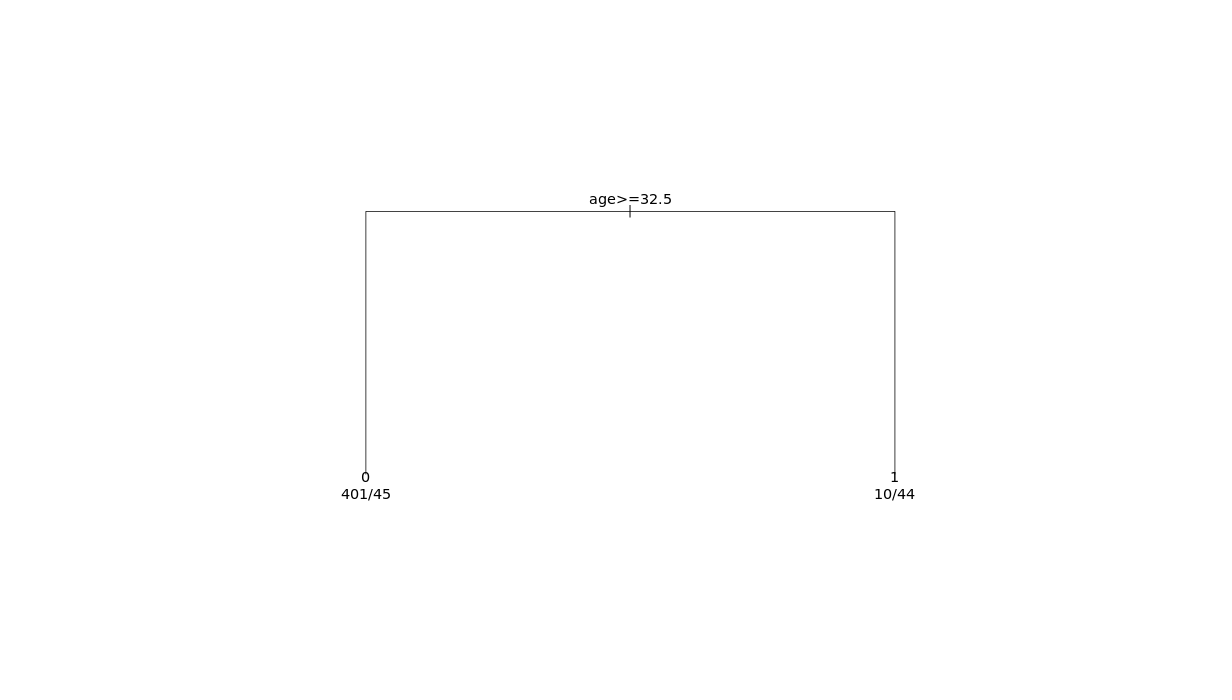

####**Instructions**


+ Le gain augmenterait.

+ ***Le gain diminuerait.***

+ Le gain ne changerait pas.

###**Création d’arbres de décision à l’aide du package rpart()**

####**1. Création d’arbres de décision à l’aide du package rpart()**

+ ***Vous avez maintenant vu comment une division parfaite peut être trouvée en utilisant la mesure de Gini. Dans l’exercice précédent, vous n’avez examiné qu’une seule scission possible.***

####**2. Imaginez...**
+ Imaginez devoir comparer manuellement toutes les divisions possibles pour trouver le meilleur! Ce serait tout un défi, non?

####**3. Paquet rpart()! Mais...**
+ Heureusement, il existe un package dans R qui construit des arbres de décision pour vous, le package rpart. 

+ Bien que ce package soit généralement très utile pour construire des arbres de décision, il est important de vous avertir dès le départ que la construction d’arbres de décision dans le contexte du risque de crédit peut être assez difficile. 

+ La raison principale en est le fait que les données sur le risque de crédit sont généralement très déséquilibrées en raison du très faible pourcentage de défauts. 

+ En utilisant les paramètres par défaut sur l’ensemble d’apprentissage de loan_data, y compris toutes les variables et en spécifiant la méthode « class », comme la variable de réponse loan_status est catégorique, vous obtenez un message d’avertissement indiquant que seule une racine est créée. 

+ La raison en est que, comme nous l’avons observé lors de la définition d’un seuil pour un modèle de régression logistique; La plus grande précision est obtenue en prédisant simplement que tous les cas ne sont pas des cas par défaut.

####**4. Trois techniques pour surmonter le déséquilibre**
+ Il y a trois choses principales que nous pouvons faire pour surmonter le déséquilibre. Une première option consiste soit à suréchantillonner votre groupe sous-représenté (dans ce cas, les valeurs par défaut), soit à sous-échantillonner le groupe surreprésenté (ou non par défaut). 

+ L’équilibrage de l’ensemble d’entraînement aura un effet positif sur le problème de précision discuté précédemment et conduira généralement à de meilleurs résultats. 

+ Notez que le suréchantillonnage ou le sous-échantillonnage ne doit être appliqué qu’à l’ensemble d’entraînement et non à l’ensemble de test! Une deuxième option consiste à modifier les probabilités préalables dans la fonction rpart(). 

+ Par défaut, les probabilités antérieures de défaut par rapport à non-défaut sont égales à leurs proportions dans l’ensemble d’apprentissage. 

+ En augmentant les probabilités antérieures de défaut, vous trompez R pour qu’il attache plus d’importance aux défauts, ce qui conduit à un meilleur arbre de décision. 

+ Comme troisième option, la fonction rpart() permet de spécifier une matrice de pertes. 

+ Dans cette matrice de pertes, différents coûts peuvent être associés à la classification erronée d’un défaut comme non-défaut par rapport à la classification erronée d’un défaut non par défaut. 

+ En augmentant le coût de classification erronée du premier, encore une fois, une plus grande attention est attirée sur la classification correcte des défauts, améliorant ainsi la qualité de l’arbre de décision. 

+ Comme les trois méthodes sont destinées à surmonter le problème du déséquilibre de classe, la validation est très importante. 

+ Lorsque le sous-échantillonnage ou le suréchantillonnage peut très bien fonctionner pour certains ensembles de données, il peut être médiocre pour d’autres, et il pourrait en être de même pour les deux autres méthodes. 

+ La meilleure méthode pour les données disponibles ne deviendra claire qu’après une validation appropriée du modèle.

####**5. Entraînons-nous!**
+ Voyons maintenant comment nous pouvons modifier ces paramètres de manière appropriée dans la fonction rpart()!

###**EXERCICES**

####**Sous-échantillonner l'ensemble de formation**

+ ***Dans la vidéo, vous avez vu que pour surmonter le problème des données déséquilibrées, vous pouvez utiliser le sous-échantillonnage ou le suréchantillonnage. L'ensemble d'apprentissage a été sous-échantillonné pour vous, de sorte qu'1/3 de l'ensemble d'apprentissage se compose de valeurs par défaut et 2/3 de non valeurs par défaut. L'ensemble de données résultant est disponible dans votre espace de travail et nommé undersampled_training_set, et contient moins d'observations (6 570 au lieu de 19 394). Dans cet exercice, vous allez créer un arbre de décision à l'aide de l'ensemble de données sous-échantillonné.***

+ *Vous remarquerez que les arbres de cet exercice et des suivants sont très gros, si gros que vous ne pouvez plus vraiment les lire. Ne vous inquiétez pas pour l'instant, nous vous dirons comment vous pouvez les rendre plus faciles à gérer dans la prochaine vidéo !*

####**Instructions**

+ Le package rpart a été installé pour vous. Chargez le package dans votre espace de travail.
+ Modifiez le code fourni de sorte qu'un arbre de décision soit construit à l'aide de l'ensemble d'apprentissage sous-échantillonné au lieu de training_set. 
+ De plus, ajoutez l'argument control = rpart.control(cp = 0.001). 

+ cp, qui est le paramètre de complexité, est la valeur seuil pour une diminution du manque d'ajustement global pour toute division. 

+ Si cp n'est pas atteint, d'autres scissions ne seront plus poursuivies. 

+ La valeur par défaut de cp est 0,01, mais pour les problèmes complexes, il est conseillé de relâcher cp.


+ Tracez l'arbre de décision à l'aide de la fonction plot et du nom de l'objet arbre. 

+ Ajoutez un deuxième argument uniform = TRUE pour obtenir des branches de taille égale.


+ La commande précédente crée simplement un arbre avec quelques nœuds et arêtes, mais sans texte (ou soi-disant "étiquettes") dessus. 

+ Utilisez la fonction text() avec le seul argument tree_undersample pour ajouter des étiquettes.

In [67]:
# Load package rpart in your workspace.
library(rpart)

# Change the code provided in the video such that a decision tree is constructed using the undersampled training set. Include rpart.control to relax the complexity parameter to 0.001.
tree_undersample <- rpart(loan_status ~ ., method = "class",
                          data =  training_set)

In [68]:
summary(tree_undersample)

Call:
rpart(formula = loan_status ~ ., data = training_set, method = "class")
  n= 19394 

  CP nsplit rel error xerror xstd
1  0      0         1      0    0

Node number 1: 19394 observations
  predicted class=0  expected loss=0.110034  P(node) =1
    class counts: 17260  2134
   probabilities: 0.890 0.110 



In [72]:
library(ROSE)
undersampled_training_set <- ovun.sample(loan_status ~ ., data = training_set, method = "under", N = 6570, seed = 1)$data
table(undersampled_training_set$loan_status )


   0    1 
4436 2134 

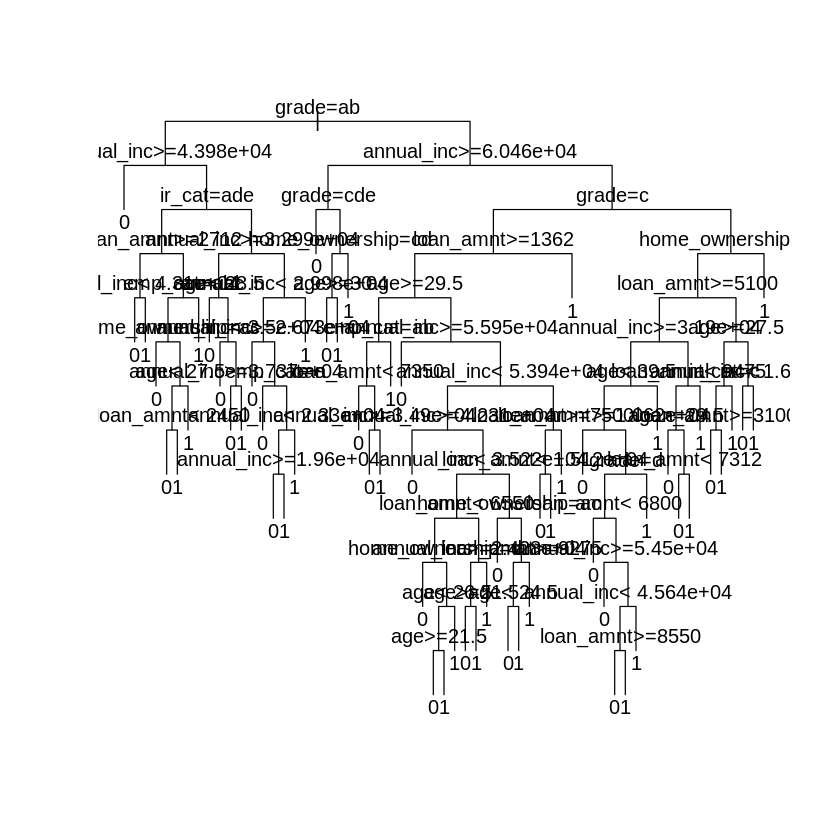

In [73]:
# Load package rpart in your workspace.
library(rpart)

# Change the code provided in the video such that a decision tree is constructed using the undersampled training set. Include rpart.control to relax the complexity parameter to 0.001.
tree_undersample <- rpart(loan_status ~ ., method = "class",
                          data =  undersampled_training_set, control = rpart.control(cp = 0.001))

# Plot the decision tree
plot(tree_undersample, uniform = TRUE)

# Add labels to the decision tree
text(tree_undersample)

####**Modification des probabilités a priori**

+ ***Comme mentionné dans la vidéo, vous pouvez également modifier les probabilités a priori pour obtenir un arbre de décision. Il s'agit d'une manière indirecte d'ajuster l'importance des erreurs de classification pour chaque classe. Vous pouvez spécifier un autre argument dans rpart() pour inclure les probabilités antérieures. L'argument que vous recherchez a la forme suivante***

      parms = list(prior=c(non_default_proportion, default_proportion))


+ *Le package rpart est maintenant déjà chargé dans votre espace de travail.*

####**Instructions**

+ Modifiez le code fourni de manière à ce qu'un arbre de décision soit construit, y compris l'argument parms et en modifiant la proportion de valeurs non par défaut à 0,7 et de valeurs par défaut à 0,3 (elles doivent toujours totaliser 1). 
+ De plus, incluez également control = rpart.control(cp = 0.001).
+ Tracez l'arbre de décision à l'aide de la fonction plot et du nom de l'objet arbre. 
+ Ajoutez un deuxième argument "uniform=TRUE" pour obtenir des branches de taille égale.
+ Ajoutez des étiquettes à l'arbre à l'aide de la fonction text() et du nom de l'objet de l'arbre de décision.

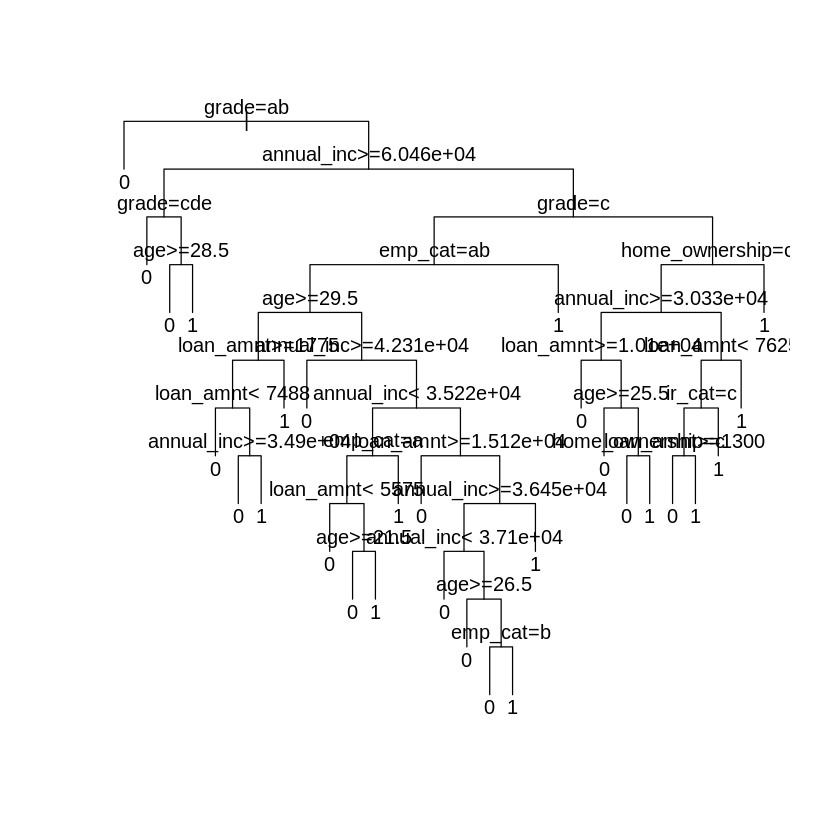

In [74]:
# Change the code below such that a tree is constructed with adjusted prior probabilities.
tree_prior <- rpart(loan_status ~ ., method = "class",
                    data = training_set, parms = list(prior = c(0.7, 0.3)), control = rpart.control(cp = 0.001))

# Plot the decision tree
plot(tree_prior, uniform = TRUE)

# Add labels to the decision tree
text(tree_prior)

####**Y compris une matrice de perte**

+ ***Troisièmement, vous pouvez inclure une matrice de perte, modifiant l'importance relative de la mauvaise classification d'un défaut comme non-défaut par rapport à un non-défaut comme défaut. Vous voulez souligner que la classification erronée d'un défaut comme un non-défaut devrait être pénalisée plus lourdement. L'inclusion d'une matrice de perte peut à nouveau être effectuée dans les paramètres d'argument de la matrice de perte.***

      parms = list(loss = matrix(c(0, cost_def_as_nondef, cost_nondef_as_def, 0), ncol=2))

+ *Ce faisant, vous construisez une matrice 2x2 avec des zéros sur la diagonale et des pénalités de perte modifiées hors de la diagonale. La matrice de perte par défaut est tous hors diagonale.*

####**Instructions**

+ Modifiez le code à condition qu'une telle matrice de perte soit incluse, avec une pénalisation 10 fois plus importante lors de la mauvaise classification d'un défaut réel en tant que non-défaut. 

+ Cela peut être fait en remplaçant cost_def_as_nondef par 10 et cost_nondef_as_def par 1. 

+ Comme dans les exercices précédents, incluez rpart.control pour assouplir le paramètre de complexité à 0,001.


+ Tracez l'arbre de décision à l'aide de la fonction plot et du nom de l'objet arbre. 

+ Ajoutez un deuxième argument uniform = TRUE pour obtenir des branches de taille égale et ajoutez des étiquettes à l'arbre en utilisant text() avec le nom de l'objet arbre.

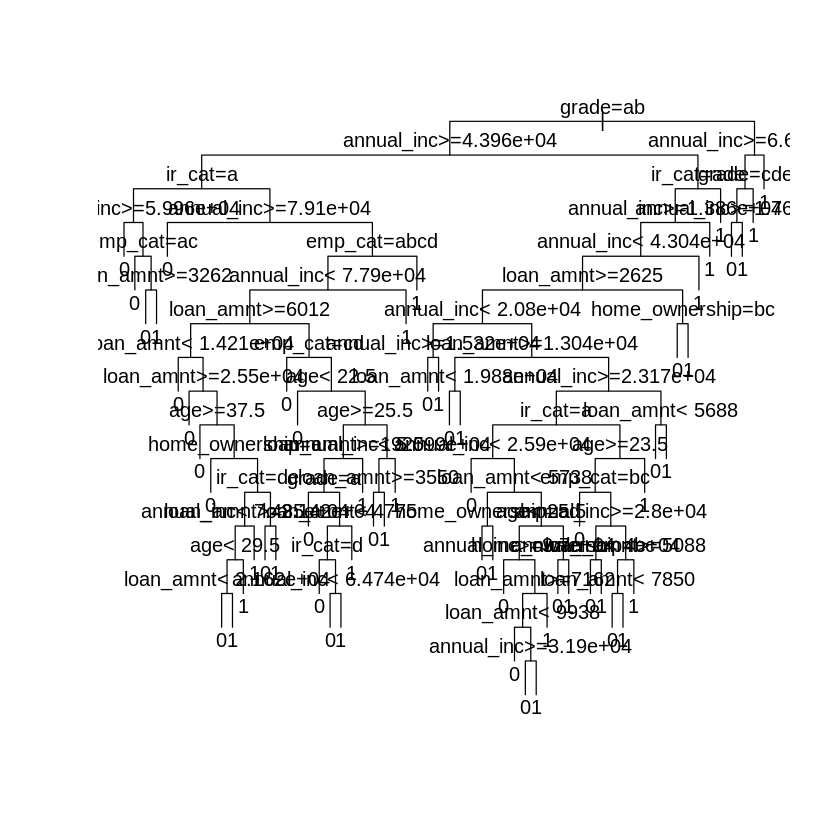

In [75]:
# Change the code below such that a decision tree is constructed using a loss matrix penalizing 10 times more heavily for misclassified defaults.
tree_loss_matrix <- rpart(loan_status ~ ., method = "class",
                          data =  training_set,
                          parms = list(loss = matrix(c(0, 10, 1, 0), ncol = 2)),
                          control = rpart.control(cp = 0.001))


# Plot the decision tree
plot(tree_loss_matrix, uniform = TRUE)

# Add labels to the decision tree
text(tree_loss_matrix)

###**Élagage de l’arbre de décision**

####**1. Élagage de l’arbre de décision**
+ ***Comme vous l’avez vu dans la séquence d’exercices précédente, les arbres de décision qui en résultent sont très grands. Il n’est généralement pas conseillé de construire d’énormes arbres de décision.***

####**2. Problèmes avec les grands arbres de décision**
+ ***Non seulement ils sont plus difficiles à interpréter, mais un surajustement peut se produire, entraînant des résultats inférieurs lors de l’application du modèle à l’ensemble de test. Le package rpart fournit des outils qui facilitent l’élagage des arbres de décision. Les fonctions utiles sont plotcp() et printcp(). Voyons ce que font ces fonctions lorsque vous les appliquez à l’arbre que nous avons construit à l’aide de l’ensemble d’apprentissage sous-échantillonné.***

####**3. Printcp et tree_undersample**
+ Jetons d’abord un coup d’œil à printcp(). 

+ En appliquant cette fonction à notre tree_undersample d’objets, vous obtenez un aperçu de la croissance de l’arbre en utilisant plus de fractionnements (donnés dans la colonne nsplit). 

+ En fait, vous pouvez modifier le paramètre de complexité cp, qui a été fixé au point-001 auparavant, pour obtenir le bon niveau de complexité. 

+ Maintenant, quel niveau choisir ? Vous souhaiteriez minimiser l’erreur dite de validation croisée de l’arbre de décision. 

+ Ces résultats sont donnés dans la colonne xerror. 

+ Comme son nom l’indique, la validation croisée à l’intérieur de l’ensemble d’apprentissage est utilisée pour obtenir cette mesure d’erreur. 

+ Comme il y a un élément aléatoire dans le processus de validation croisée, il est nécessaire de définir une graine si vous voulez que vos résultats soient reproductibles.

####**4. Plotcp et tree_undersample**
+ **Vous pouvez également tracer l’erreur de validation croisée en fonction du paramètre de complexité cp et de la taille de l’arborescence à l’aide de la fonction plotcp.**

####**5. Plotcp et tree_undersample**
+ **L’erreur minimale de validation croisée peut être trouvée ici, où le paramètre de complexité cp est égal au point-003653. Pour cette valeur cp exacte, vous pouvez consulter à nouveau printcp().**

####**6. Tracez l’arbre élagué**
+ Maintenant, pour élaguer l’arbre, la fonction prune() peut être utilisée, avec l’arbre initial non élagué comme premier argument et la valeur cp qui a minimisé l’erreur de validation croisée comme deuxième argument. 

+ En traçant l’arbre élagué, vous obtenez un arbre de décision plus petit. 

+ Notez que cet arbre ne vous donne pas d’informations sur le nombre réel de valeurs par défaut par rapport aux non-valeurs par défaut présentes dans chaque feuille.

####**7. Tracez l’arbre élagué**
+ Si vous souhaitez obtenir ces informations, vous pouvez inclure l’argument use-dot-n est égal à TRUE dans la fonction text(). 

+ Notez que ces valeurs se réfèrent uniquement à l’ensemble d’entraînement ! 

+ Gardez à l’esprit qu’une réponse OUI à l’instruction de test dans un nœud vous amènera à suivre la branche de gauche, et une réponse NON à l’instruction de test vous amènera à suivre la branche de droite. 

+ Ce n’est pas très intuitif dans le tracé standard pour le package de pièces. De plus, le test « home_ownership égale cd » n’est pas très informatif.

####**8. prp() dans le rpart.plot-package**
+ Un tracé plus intuitif est obtenu en utilisant la fonction prp() dans le package rpart.plot. 

+ Lorsque vous tracez à l’aide de prp(), vous recevez des conseils sur la branche à prendre en fonction de la réponse à la question fractionnée. 

+ Vous obtenez également le nom réel du facteur pour les variables factorielles, comme vous pouvez le voir pour les catégories propre et loyer pour home_ownership.

####**9. prp() dans le part.plot-package**
+ Si vous souhaitez que le nombre de cas par défaut par rapport aux cas non par défaut soit le cas, vous pouvez simplement inclure l’argument extra égal à 1.

####**10. Entraînons-nous!**
+ Dans les exercices qui suivent, vous taillerez les arbres que vous avez construits dans les exercices précédents!

###**EXERCICES**

####***Élaguer l'arbre avec des probabilités a priori modifiées**

+ ***Dans la vidéo, vous avez appris qu'élaguer un arbre est nécessaire pour éviter le surajustement. Il y avait de grands arbres dans les exercices précédents et maintenant vous allez mettre en pratique ce que vous avez appris et élaguer l'arbre précédemment construit avec les probabilités a priori modifiées. Le package rpart est déjà chargé dans votre espace de travail.***

+ **Vous allez d'abord définir une graine pour vous assurer que les résultats sont reproductibles, comme mentionné dans la vidéo, car vous examinerez les résultats d'erreur validés. Les résultats impliquent un caractère aléatoire et peuvent différer légèrement lors de la réexécution de la fonction avec une graine différente.**

+ *Dans cet exercice, vous apprendrez à identifier le paramètre de complexité (CP) qui minimisera les résultats d'erreur de validation croisée, puis à élaguer votre arbre en fonction de cette valeur.*

####**Instructions**

+ tree_prior est chargé dans votre espace de travail.
+ Utilisez plotcp() pour visualiser l'erreur croisée (X-val Relative Error) en relation avec le paramètre de complexité pour tree_prior.
+ Utilisez printcp() pour imprimer un tableau d'informations sur le CP, les fractionnements et les erreurs. 
+ Voyez si vous pouvez identifier quelle division a l'erreur minimale de validation croisée dans tree_prior.

+ Utilisez which.min() pour identifier quelle ligne dans tree_prior$cptable a l'erreur de validation croisée minimale "xerror". Affectez-le à index.

+ Créez tree_min en sélectionnant l'index de tree_prior$cptable dans la colonne "CP".

+ Utilisez la fonction prune() pour obtenir l'arbre élagué. Appelez l'arbre élagué ptree_prior.

+ Le package rpart.plot est chargé dans votre espace de travail. Tracez l'arbre élagué à l'aide de la fonction prp() (réglage par défaut).

In [100]:
tree_prior <- rpart(loan_status ~ ., method = "class",
                    data = training_set, parms = list(prior = c(0.7, 0.3)), control = rpart.control(cp = 0.001))

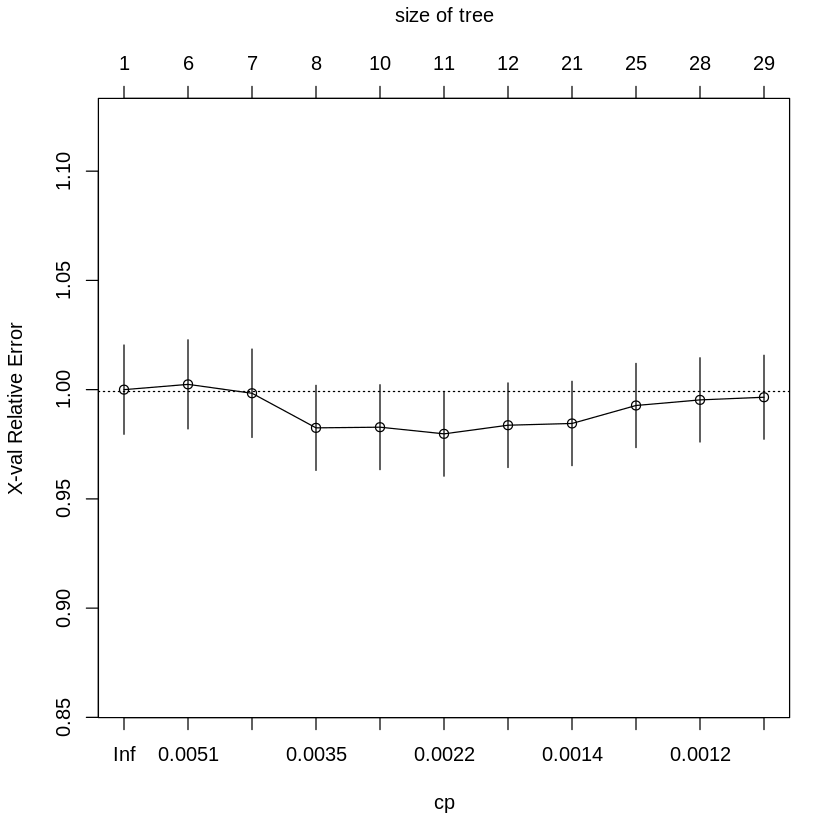

In [101]:
# tree_prior is loaded in your workspace

# Plot the cross-validated error rate as a function of the complexity parameter
plotcp(tree_prior)

In [102]:
# Use printcp() to identify for which complexity parameter the cross-validated error rate is minimized.
printcp(tree_prior)


Classification tree:
rpart(formula = loan_status ~ ., data = training_set, method = "class", 
    parms = list(prior = c(0.7, 0.3)), control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age            annual_inc     emp_cat        grade          home_ownership
[6] ir_cat         loan_amnt     

Root node error: 5818.2/19394 = 0.3

n= 19394 

          CP nsplit rel error  xerror     xstd
1  0.0055301      0   1.00000 1.00000 0.020422
2  0.0047484      5   0.97235 1.00242 0.020381
3  0.0043786      6   0.96760 0.99834 0.020220
4  0.0028281      7   0.96322 0.98251 0.019463
5  0.0026498      9   0.95757 0.98282 0.019431
6  0.0018569     10   0.95492 0.97977 0.019372
7  0.0014322     11   0.95306 0.98372 0.019351
8  0.0013610     20   0.93861 0.98452 0.019300
9  0.0013529     24   0.93317 0.99275 0.019262
10 0.0011536     27   0.92793 0.99531 0.019272
11 0.0010000     28   0.92677 0.99653 0.019212


In [103]:
# Create an index for of the row with the minimum xerror
index <- which.min(tree_prior$cptable[ , "xerror"])
index

6 
6

In [104]:
# Create tree_min
tree_min <- tree_prior$cptable[index, "CP"]

tree_min

[1] 0.001856894

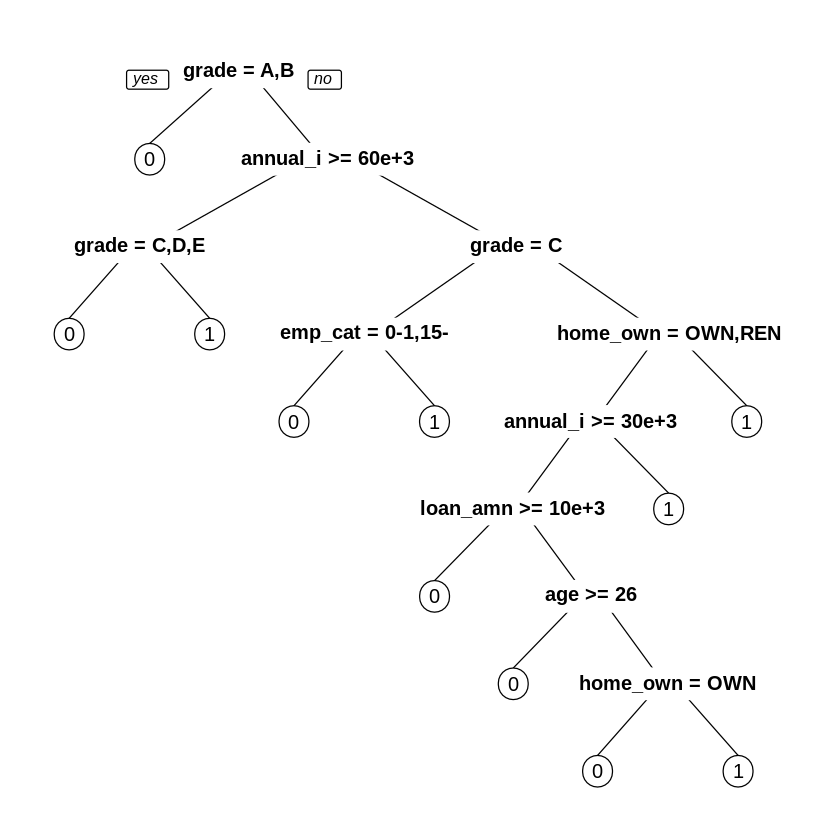

In [105]:
#  Prune the tree using tree_min
ptree_prior <- prune(tree_prior, cp = 0.00185689364889231)

# Use prp() to plot the pruned tree
library(rpart.plot)
prp(ptree_prior) 

####**Tailler l'arbre avec la matrice de perte**

+ *Dans cet exercice, vous allez élaguer l'arbre qui a été construit à l'aide d'une matrice de perte afin de pénaliser davantage les défauts mal classés que les non-défauts mal classés.*

####**Instructions**

+ Exécutez le code pour définir une graine et reconstruisez tree_loss_matrix.
+ Utilisez la fonction plotcp() pour examiner la structure d'erreur à validation croisée.
+ En regardant le cp-plot, vous remarquerez que l'élagage de l'arbre en utilisant l'erreur de validation croisée minimale conduira à un arbre aussi grand que l'arbre non élagué, car l'erreur de validation croisée atteint son minimum pour cp = 0,001. 
+ Parce que vous souhaitez rendre l'arbre un peu plus petit, essayez d'élaguer l'arbre en utilisant cp = 0,0012788. 
+ Pour ce paramètre de complexité, l'erreur de validation croisée se rapproche de l'erreur minimale observée. 
+ Appelez l'arbre élagué ptree_loss_matrix.
+ Le package rpart.plot est chargé dans votre espace de travail. 
+ Tracez l'arbre élagué à l'aide de la fonction prp() (y compris l'argument extra = 1).

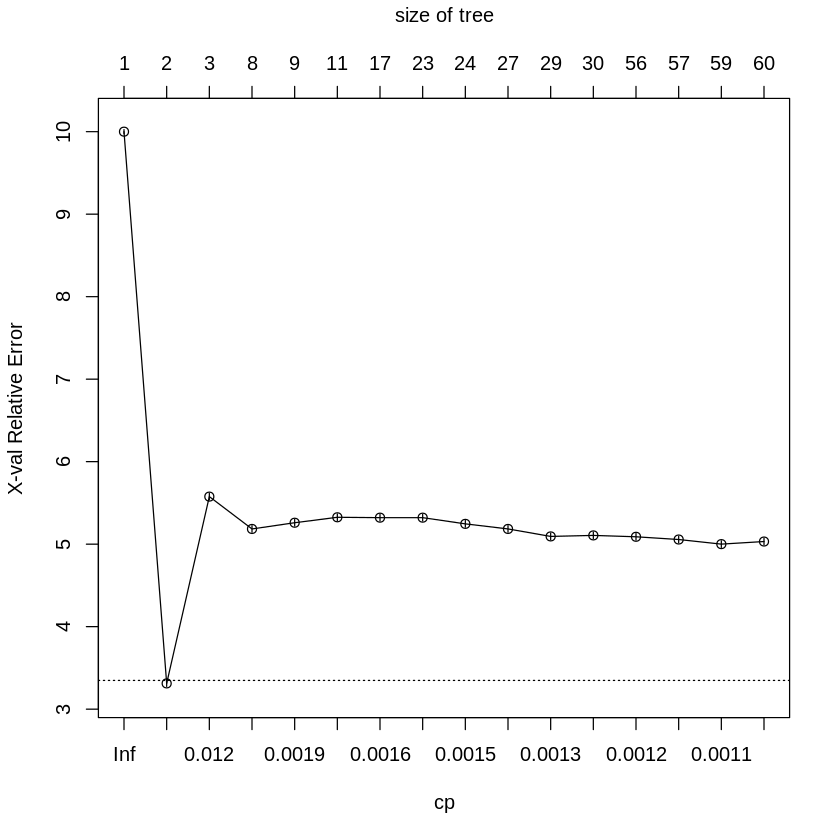

In [106]:
# set a seed and run the code to construct the tree with the loss matrix again
set.seed(345)
tree_loss_matrix  <- rpart(loan_status ~ ., method = "class", data = training_set,
                           parms = list(loss=matrix(c(0, 10, 1, 0), ncol = 2)),
                           control = rpart.control(cp = 0.001))

# Plot the cross-validated error rate as a function of the complexity parameter
plotcp(tree_loss_matrix)

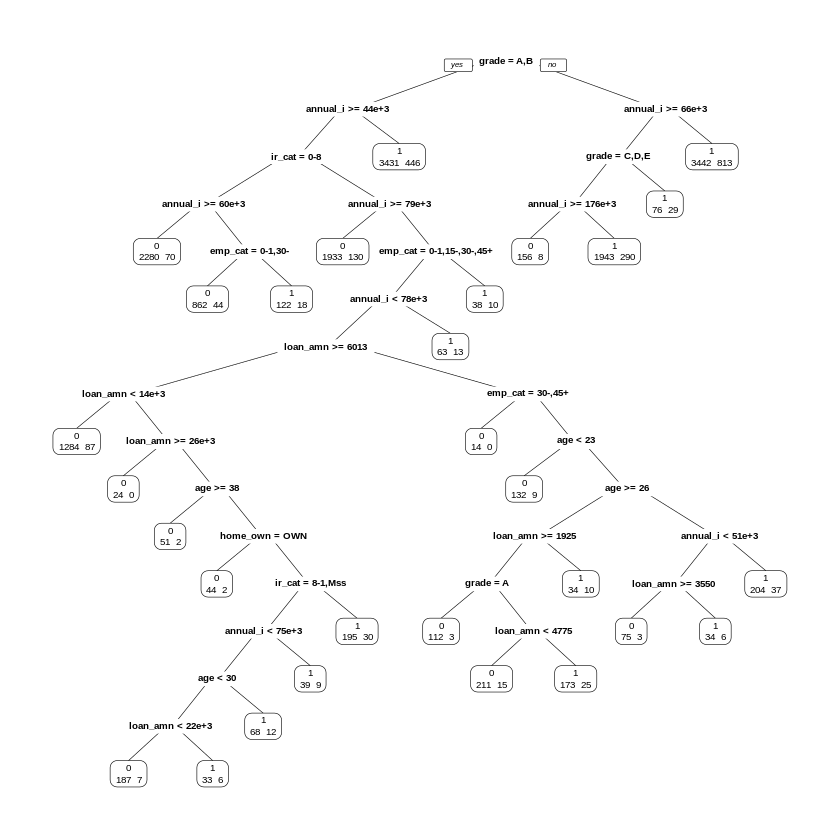

In [107]:
# Prune the tree using cp = 0.0012788
ptree_loss_matrix <- prune(tree_loss_matrix, cp=0.0012788)

# Use prp() and argument extra = 1 to plot the pruned tree
prp(ptree_loss_matrix, extra=1)

###**Autres options d’arborescence et construction de matrices de confusion**

####**1.Autres options d’arborescence et construction de matrices de confusion**

+ ***Nous avons couvert plusieurs options pour faciliter la construction d’un arbre, en particulier sur des données déséquilibrées. Bien sûr, l’éventail des possibilités est infini, et il existe d’autres arguments que vous pouvez passer à la fonction rpart() pour façonner votre arbre de décision de défaut de prêt. Je vais passer en revue certains des plus importants de cette vidéo.***

####**2. Autre rpart() intéressant - arguments**

+ Un argument intéressant dans rpart() est les poids, qui vous permettent d’inclure des poids de cas pour chacun des cas dans l’ensemble d’entraînement. 

+ L’augmentation des pondérations pour les cas de défaut aurait été une autre stratégie plausible pour contrer le déséquilibre dans l’arbre de décision. 

+ Les autres arguments intéressants que je vais mentionner ici font tous partie de la fonction rpart-dot-control qui peut être transmise au contrôle d’argument. 

+ Nous avons déjà utilisé cette fonction pour modifier le paramètre de complexité cp. 

+ Un argument intéressant ici est minsplit, qui vous permet de modifier le nombre minimum d’observations qui doivent exister dans un nœud pour qu’une scission soit tentée. 

+ La valeur par défaut de cet argument est égale à 20, mais pour les données déséquilibrées, il peut être utile de réduire cette valeur. 

+ L’argument minbucket spécifie le nombre minimal d’observations dans un nœud feuille. La valeur par défaut ici est un tiers de la valeur spécifiée dans minsplit, mais il peut être utile d’essayer d’autres valeurs. 
+ Sachez qu’une baisse excessive de cette valeur pourrait conduire à un surajustement. 
+ La dernière chose que nous devons faire est de nous assurer que nous évaluons notre arbre de décision.

####**3. Faire des prédictions à l’aide de l’arbre de décision**
+ Jusqu’à présent, nous n’utilisions que l’ensemble d’entraînement, mais nous voulons utiliser notre ensemble de tests pour évaluer le résultat. 
+ Cela peut être fait en utilisant la fonction predict(). + Le code permettant de faire des prédictions à l’aide du modèle avec l’ensemble de données sous-échantillonné est illustré ici. 
+ Notez que nous utilisons la version élaguée de l’arbre.
+ Inclure le type d’argument est égal à « classe », vous obtenez immédiatement un vecteur de prédictions, sans avoir à utiliser de valeur de coupure, contrairement à ce que nous avons fait avec la régression logistique. 
+ Dans certains cas, cependant, vous aimeriez avoir une prédiction non binaire et choisir vous-même une limite. 
+ Dans ce cas, vous pouvez simplement laisser de côté l’argument type dans la fonction predict(), et vous obtiendrez des probabilités au lieu de prédictions binaires. 
+ Ces probabilités sont dérivées des proportions du nœud feuille où un cas particulier se termine compte tenu de ses valeurs de covariables.

####**4. Construction d’une matrice de confusion**
+ Ici, la matrice de confusion est donnée pour l’arbre de décision qui a été construit en utilisant les données sous-échantillonnées et les prédictions binaires. 
+ Même si nous avons utilisé le sous-échantillonnage, très peu de valeurs par défaut sont prévues pour notre ensemble de tests. 
+ Il pourrait être utile ici d’utiliser des prédictions de probabilité au lieu de prédictions binaires et d’abaisser le seuil.

####**5. Entraînons-nous!**
+ Explorons!

###**EXERCICES**

####**Un dernier arbre utilisant plus d'options**

+ ***Dans cet exercice, vous utiliserez quelques arguments finaux qui ont été discutés dans la vidéo. Certaines spécifications de la fonction rpart.control() seront modifiées et certains poids seront inclus à l'aide de l'argument weights dans rpart(). Le vecteur case_weights a été construit pour vous et est chargé dans votre espace de travail. Ce vecteur contient des pondérations de 1 pour les valeurs non par défaut dans l'ensemble d'apprentissage et des pondérations de 3 pour les valeurs par défaut dans les ensembles d'apprentissage. En spécifiant des pondérations plus élevées pour la valeur par défaut, le modèle accordera une plus grande importance à la classification correcte des valeurs par défaut.***

####**Instructions**

+ Définissez une graine de 345.
+ Complétez le code fourni en passant case_weights à l'argument weights de `rpart().
+ Modifiez le nombre minimum de divisions autorisées dans un nœud à 5 et le nombre minimum d'observations autorisées dans les nœuds feuilles à 2 en utilisant respectivement les arguments minsplit et minbucket dans rpart.control.
+ Utilisez la fonction plotcp() pour déterminer où le taux d'erreur de validation croisée peut être minimisé.
+ Utilisez which.min() pour identifier la ligne avec le minimum "xerror" dans tree_weights$cp. Affectez-le à index.
+ Utilisez le code fourni pour sélectionner le CP pour lequel l'erreur de validation croisée est minimisée
+ Élaguez l'arbre à l'aide du paramètre de complexité où le taux d'erreur de validation croisée est minimisé. 
+ Stockez l'arbre élagué dans ptree_weights.
+ Tracez l'arbre élagué à l'aide de la fonction prp(). 
+ Incluez un deuxième argument supplémentaire et définissez-le égal à 1.

In [110]:
case_weights <- ifelse(training_set$loan_status == 0, 1, 3)
table(case_weights)

case_weights
    1     3 
17260  2134 

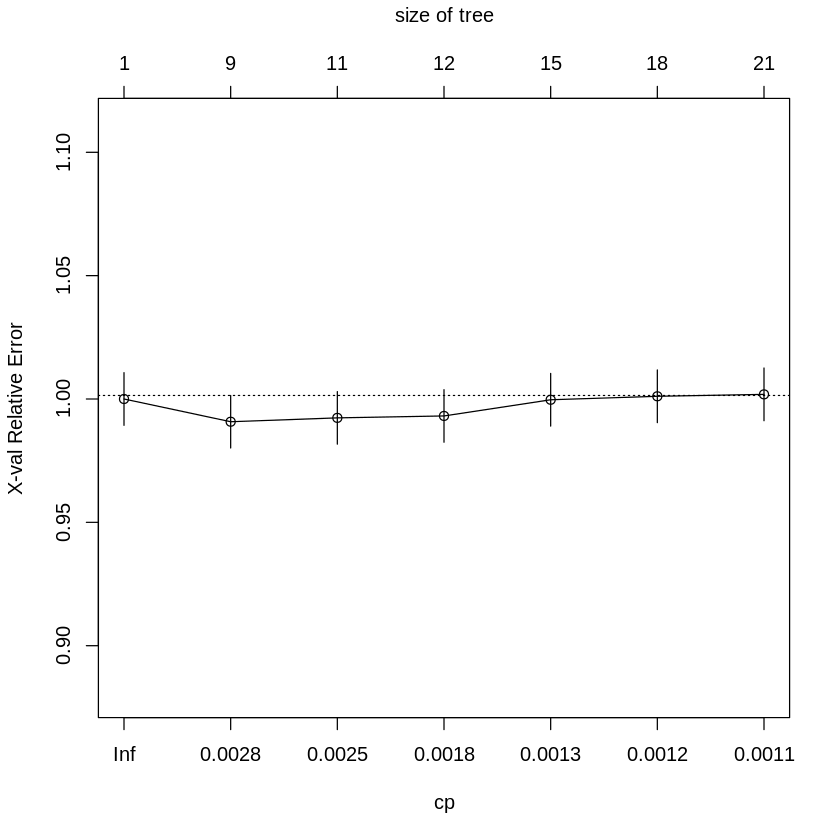

In [111]:
# set a seed and run the code to obtain a tree using weights, minsplit and minbucket
set.seed(345)
tree_weights <- rpart(loan_status ~ ., method = "class",
                      data = training_set,
                      weights = case_weights,
                      control = rpart.control(minsplit = 5, minbucket = 2, cp = 0.001))

# Plot the cross-validated error rate for a changing cp
plotcp(tree_weights)

In [112]:
# Create an index for of the row with the minimum xerror
index <- which.min(tree_weights$cp[ , "xerror"])

index

2 
2

In [113]:
# Create tree_min
tree_min <- tree_weights$cp[index, "CP"]

tree_min

[1] 0.00265542

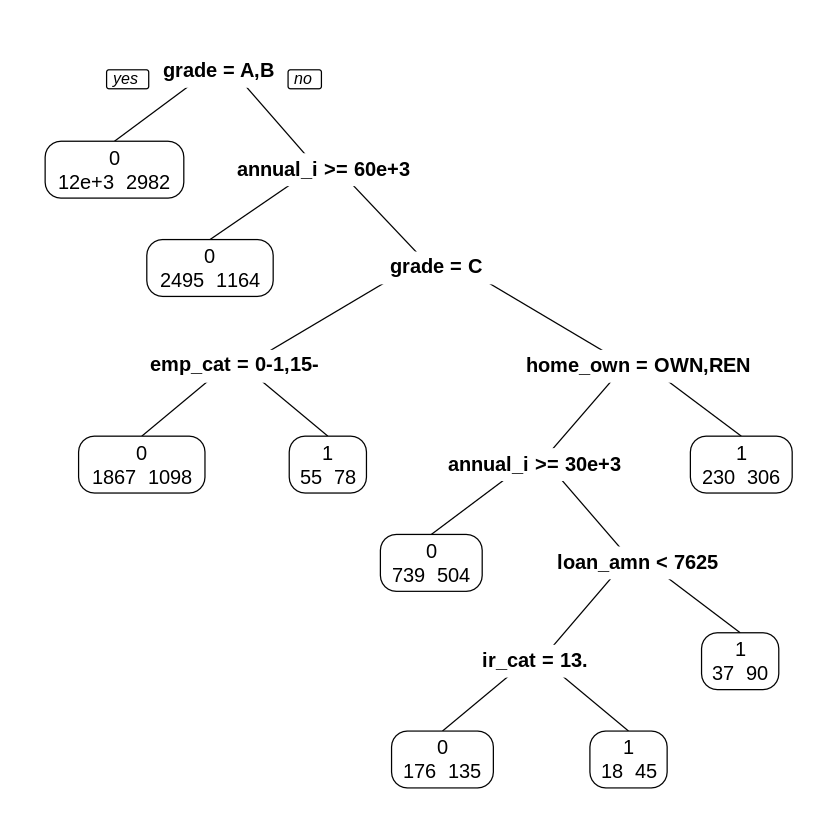

In [114]:
# Prune the tree using tree_min
ptree_weights <- prune(tree_weights, cp = tree_min)

# Plot the pruned tree using the rpart.plot()-package
prp(ptree_weights, extra =1)

***Joli! Continuons à en apprendre davantage sur les matrices de confusion et à évaluer la précision de nos arbres finaux.***

####**Matrices de confusion et précision de nos arbres finaux**

+ ***Au cours des derniers exercices, vous avez construit un certain nombre d'arbres de décision élagués, avec quatre au total. Comme vous pouvez le constater, le nombre éventuel de scissions varie passablement d'un arbre à l'autre :***

      ptree_undersample # 7 divisions
      ptree_prior # 9 divisions
      ptree_loss_matrix # 24 divisions
      ptree_weights # 6 divisions


+ **Il est maintenant important de savoir quel arbre est le plus performant en termes de précision. Afin d'obtenir la précision, vous commencerez par faire des prédictions à l'aide de l'ensemble de test et construirez la matrice de confusion pour chacun de ces arbres. Vous ajouterez l'argument type = "classe" lors de ces prédictions. En faisant cela, il n'est pas nécessaire de définir un seuil.**

+ ***Néanmoins, il est important d'être conscient du fait que non seulement la précision est importante, mais aussi la sensibilité et la spécificité. De plus, prédire des probabilités au lieu de valeurs binaires (0 ou 1) présente l'avantage de pouvoir déplacer le seuil. Là encore, la difficulté ici est le choix du cut-off. Vous y reviendrez au chapitre suivant.***

+ *Au cas où vous auriez besoin d'un rappel, voici comment calculer la précision :*
 
 $$\textrm{Classification accuracy} = \frac{(TP + TN)}{(TP + FP + TN + FN)}$$

####**Instructions**

+ Utilisez predict() pour faire des prédictions pour les quatre arbres. 
+ Le test_set doit être inclus dans l'argument newdata. 
+ N'oubliez pas d'inclure type="class" !
+ Construisez des matrices de confusion pour chacun de ces arbres de décision. 
+ Utilisez la fonction table() et incluez d'abord le statut "true" (en utilisant test_set$loan_status), suivi de la prédiction.
+ Calculez la précision en utilisant chacune des matrices de confusion.

In [117]:
ptree_undersample <- tree_undersample
ptree_prior <- tree_prior 
ptree_loss_matrix <- tree_loss_matrix
ptree_weights <- tree_weights

In [118]:
# Make predictions for each of the pruned trees using the test set.
pred_undersample <- predict(ptree_undersample, newdata = test_set,  type = "class")
pred_prior <- predict(ptree_prior, newdata = test_set, type = "class")
pred_loss_matrix <- predict(ptree_loss_matrix, newdata = test_set, type = "class")
pred_weights <- predict(ptree_weights, newdata = test_set, type = "class")

In [120]:
# Construct confusion matrices using the predictions.
confmat_undersample <- table(test_set$loan_status, pred_undersample)
print(confmat_undersample)

   pred_undersample
       0    1
  0 7790  814
  1  921  172


In [121]:
confmat_prior <- table(test_set$loan_status, pred_prior)
print(confmat_prior)

   pred_prior
       0    1
  0 8121  483
  1  985  108


In [122]:
confmat_loss_matrix <- table(test_set$loan_status, pred_loss_matrix)
print(confmat_loss_matrix)

   pred_loss_matrix
       0    1
  0 4368 4236
  1  349  744


In [123]:
confmat_weights <- table(test_set$loan_status, pred_weights)
print(confmat_weights)

   pred_weights
       0    1
  0 8291  313
  1 1018   75


In [124]:
# Compute the accuracies
acc_undersample <- sum(diag(confmat_undersample)) / nrow(test_set)
print(acc_undersample)

[1] 0.8210787


In [125]:
acc_prior <- sum(diag(confmat_prior)) / nrow(test_set)
print(acc_prior)

[1] 0.848613


In [126]:
acc_loss_matrix <- sum(diag(confmat_loss_matrix)) / nrow(test_set)
print(acc_loss_matrix)

[1] 0.5271734


In [127]:
acc_weights <- sum(diag(confmat_weights)) / nrow(test_set)
print(acc_weights)

[1] 0.8627411


####**Optimisation de la précision**
+ ***Les précisions obtenues dans l'exercice précédent,***

      acc_undersample
      acc_prior
      acc_loss_matrix
      acc_weights

+ *sont à nouveau chargés dans votre espace de travail. Jetez-y un coup d'œil. Quel arbre est le plus performant, si l'on considère uniquement la précision ?*

####**Instructions**


+ ptree_undersample

+ ptree_prior

+ ptree_loss_matrix

+ ***ptree_weights***

###**Trouver le bon seuil : la courbe stratégique**

####**1. Trouver le bon seuil : la courbe stratégique**
+ ***Dans les chapitres précédents, nous vous avons donné un aperçu de la façon dont les modèles de régression logistique et les arbres de décision peuvent être utilisés pour calculer la probabilité de défaut.***

####**2. Construction d’une matrice de confusion**
+ En utilisant la fonction predict() sur un modèle de régression logistique avec type = réponse, vous obtenez un vecteur avec les probabilités prédites de défaut. 
+ En utilisant la fonction predict() comme ceci sur un modèle d’arborescence, vous obtiendrez une matrice avec deux colonnes: 
  + **les nombres dans la colonne de gauche représentent la probabilité de non-défaut,**
 
  + **et les nombres dans la colonne de droite représentent les probabilités de défaut.** 

  + **Sélectionnez la deuxième colonne pour la rendre comparable aux prédictions d’un modèle de régression logistique.**

####**3. Limite?**
+ Jusqu’à présent, nous avons défini des seuils basés sur les meilleures suppositions ou notre intuition afin de créer des matrices de précision pour chacun des modèles utilisés. 
+ Le choix d’une coupure est toutefois important, car cela modifie les métriques de validation. 
+ De plus, en utilisant ces modèles pour les futurs demandeurs qui arrivent, la limite pourrait être un moyen de décider quels demandeurs de prêt obtiendront un prêt et quels demandeurs ne le feront pas. 
+ Il est clair que ces modèles ne sont jamais parfaits, et peu importe le nombre de demandeurs qu’une banque refuse, il y aura toujours des débiteurs qui font défaut. 
+ La bonne chose est que les modèles peuvent aider une banque à décider combien de prêts elle doit approuver si elle ne veut pas dépasser un certain pourcentage de défauts dans son portefeuille de clients. 
+ Voyons comment cela fonctionne. Nous allons commencer par un exemple simple en utilisant le modèle de régression logit complet d’avant. 
+ Supposons que l’ensemble de tests contienne de nouveaux candidats et qu’une banque décide de rejeter 20% de ces nouveaux candidats en fonction de leur probabilité de défaut.

####**4. Une certaine stratégie**
+ Cela signifie que les 20% ayant la probabilité de défaut prédite la plus élevée seront rejetés. 
+ Pour obtenir la valeur seuil qui conduirait à un « 1 » prédit (ou par défaut) pour 20 % des cas de l’ensemble de tests, vous examinez le quantile de 80 % du vecteur de prédictions. 
+ Après avoir utilisé ce seuil, vous savez quels demandeurs de prêt d’ensembles de tests auraient été rejetés en utilisant un taux d’acceptation de 80%.

####**5. Une certaine stratégie**
+ En fait, nous voulons maintenant examiner le véritable statut des prêts qui auraient été acceptés en utilisant ce seuil, et voir quel pourcentage dans cet ensemble de prêts acceptés a réellement fait défaut (ce qui est également appelé le « mauvais taux »). 
+ Après avoir accepté 80% des prêts, nous voyons que le mauvais taux est égal à 8 points-97%.

####**6. Le tableau stratégique**
+ Si vous répétez cette opération pour plusieurs taux d’acceptation, vous pouvez construire un tableau entier avec les taux d’acceptation, les valeurs seuils correspondantes et le pourcentage de « créances douteuses » acceptées. 
+ C’est un outil utile pour une banque car les banques peuvent adapter leur taux d’acceptation en fonction du pourcentage de créances douteuses qu’elles peuvent autoriser dans leur portefeuille de prêts. 
+ Supposons qu’une banque ne puisse autoriser qu’un taux incorrect de 8%. 
+ En utilisant ce modèle, une banque décidera d’accepter 65% des prêts.

####**7. La courbe stratégique**
+ Cette courbe dite de stratégie vous fournit également un outil visuel, montrant visuellement les mauvais taux en fonction du taux d’acceptation.

####**8. Entraînons-nous!**
+ Maintenant, mettons en pratique ce que vous avez appris!

###**EXERCICES**

####**Calculer un mauvais taux étant donné un taux d'acceptation fixe**
+ ***Dans la vidéo, vous avez appris à calculer le mauvais taux (ou le pourcentage de défauts) dans le portefeuille de prêts d'une banque lorsqu'il est donné :***

  + un modèle spécifique
  + le taux d'acceptation

+ *Dans cet exercice, vous allez calculer le mauvais taux auquel une banque peut s'attendre en utilisant l'arbre élagué ptree_prior que vous avez ajusté auparavant, et un taux d'acceptation de 80 %. Pour rappel, l'arbre est tracé sur votre droite.*

####**Instructions**

+ Dans le script, on vous fournit le code pour faire des prédictions pour la probabilité de défaut en utilisant l'arbre élagué et test_set. 
+ N'oubliez pas que si vous utilisez la fonction predict() pour un arbre, la probabilité de défaut peut être trouvée dans la deuxième colonne. 
+ Par conséquent, [,2] a été collé à la fonction predict().
+ Obtenez le seuil qui conduit à un taux d'acceptation de 80 %, en utilisant prob_default_prior. 
+ Vous pouvez utiliser la fonction quantile()- pour ce faire, en définissant le deuxième argument sur 0,8. 
+ Attribuez le nom cutoff_prior.
+ Le code permettant d'obtenir les prédictions par défaut binaires réelles (0 ou 1) est fourni. ifelse() ici. 
+ Nommez l'objet bin_pred_prior_80.
+ Le code pour sélectionner les indicateurs par défaut de test_set pour les prêts acceptés selon un taux d'acceptation de 80% est fourni.
+ Calculez le pourcentage de défauts de paiement (ou le "bad rate") pour les prêts acceptés. 
+ Il s'agit du nombre d'occurrences de 1 dans accepté_status_prior_80, divisé par le nombre total d'instances dans ce vecteur. 
+ Imprimez la solution sur votre console R.

In [128]:
# Make predictions for the probability of default using the pruned tree and the test set.
prob_default_prior <- predict(ptree_prior, newdata = test_set)[ ,2]

# Obtain the cutoff for acceptance rate 80%
cutoff_prior <- quantile(prob_default_prior, 0.8)

# Obtain the binary predictions.
bin_pred_prior_80 <- ifelse(prob_default_prior > cutoff_prior, 1, 0)

# Obtain the actual default status for the accepted loans
accepted_status_prior_80 <- test_set$loan_status[bin_pred_prior_80 == 0]

# Obtain the bad rate for the accepted loans
sum(accepted_status_prior_80) / length(accepted_status_prior_80)

[1] 0.102678

####**Le tableau de stratégie et la courbe de stratégie**

+ ***En répétant les calculs que vous avez effectués dans l'exercice précédent pour plusieurs taux d'acceptation, vous pouvez obtenir un tableau de stratégie. Ce tableau peut être un outil utile pour les banques, car il peut leur donner un meilleur aperçu pour définir une stratégie d'acceptation.***

+ *Vous savez maintenant comment calculer un mauvais taux pour un certain taux d'acceptation, donc la fonction strategy_bank a été écrite et chargée dans votre espace de travail pour accélérer les choses. Cette fonction calcule le cut-off et le bad rate pour les taux d'acceptation multiples de 5% (0%, 5%, 10%, …).*

####**Instructions**

+ Jetez un œil à la fonction strategy_bank.
+ Le vecteur predictions_cloglog contient les probabilités prédites de défaut à l'aide du modèle cloglog que vous avez utilisé au chapitre 2, le vecteur predictions_loss_matrix contient les probabilités prédites de défaut à l'aide de l'arbre élagué comprenant une matrice de perte (précédemment construite au chapitre 3). 
+ Appliquez la fonction strategy_bank à chacun des vecteurs de prédiction, attribuez le nom strategy_cloglog et strategy_loss_matrix respectivement.
+ Les tables de stratégie peuvent être obtenues en utilisant les noms d'objet en combinaison avec $table.
+ Les courbes de stratégie ont été tracées pour vous. 
+ La courbe de stratégie du modèle d'arbre montre un comportement assez étrange. 
+ En raison de la structure des arbres de classification, vous pourriez avoir une plus grande chance de "sauts" étranges ici. 
+ De plus, l'arbre avec une matrice de perte était très grand, donc cela pourrait être le résultat d'un surajustement !

In [129]:
strategy_bank <- function(prob_of_def){
    cutoff = rep(NA, 21)
    bad_rate = rep(NA, 21)
    accept_rate = seq(1, 0, by = -0.05)
    for (i in 1:21) {
        cutoff[i] = quantile(prob_of_def, accept_rate[i])
        pred_i = ifelse(prob_of_def > cutoff[i], 1, 0)
        pred_as_good = test_set$loan_status[pred_i == 0]
        bad_rate[i] = sum(pred_as_good)/length(pred_as_good)
    }
        table = cbind(accept_rate, cutoff = round(cutoff, 4), bad_rate = round(bad_rate, 
        4))
    return(list(table = table, bad_rate = bad_rate, accept_rate = accept_rate, 
        cutoff = cutoff))
}

In [130]:
#withougth type = "class" to get probabilities
predictions_loss_matrix <- predict(ptree_loss_matrix, newdata = test_set)[,2]

In [131]:
# Have a look at the function strategy_bank


# Apply the function strategy_bank to both predictions_cloglog and predictions_loss_matrix
strategy_cloglog <- strategy_bank(predictions_cloglog)
strategy_cloglog

accept_rate,cutoff,bad_rate
1.00,0.3404,0.1127
0.95,0.1939,0.1090
0.90,0.1832,0.1047
0.85,0.1702,0.1003
0.80,0.1477,0.0973
0.75,0.1388,0.0936
0.70,0.1329,0.0894
0.65,0.1267,0.0855
0.60,0.1185,0.0823
0.55,0.1093,0.0802


In [132]:
strategy_loss_matrix <- strategy_bank(predictions_loss_matrix)
strategy_loss_matrix

accept_rate,cutoff,bad_rate
1.00,0.3913,0.1127
0.95,0.1911,0.1110
0.90,0.1911,0.1110
0.85,0.1911,0.1110
0.80,0.1911,0.1110
0.75,0.1818,0.0942
0.70,0.1545,0.0899
0.65,0.1503,0.0901
0.60,0.1299,0.0872
0.55,0.1299,0.0872


In [133]:
# Obtain the strategy tables for both prediction-vectors
strategy_cloglog$table

accept_rate,cutoff,bad_rate
1.00,0.3404,0.1127
0.95,0.1939,0.1090
0.90,0.1832,0.1047
0.85,0.1702,0.1003
0.80,0.1477,0.0973
0.75,0.1388,0.0936
0.70,0.1329,0.0894
0.65,0.1267,0.0855
0.60,0.1185,0.0823
0.55,0.1093,0.0802


In [134]:
strategy_loss_matrix$table

accept_rate,cutoff,bad_rate
1.00,0.3913,0.1127
0.95,0.1911,0.1110
0.90,0.1911,0.1110
0.85,0.1911,0.1110
0.80,0.1911,0.1110
0.75,0.1818,0.0942
0.70,0.1545,0.0899
0.65,0.1503,0.0901
0.60,0.1299,0.0872
0.55,0.1299,0.0872


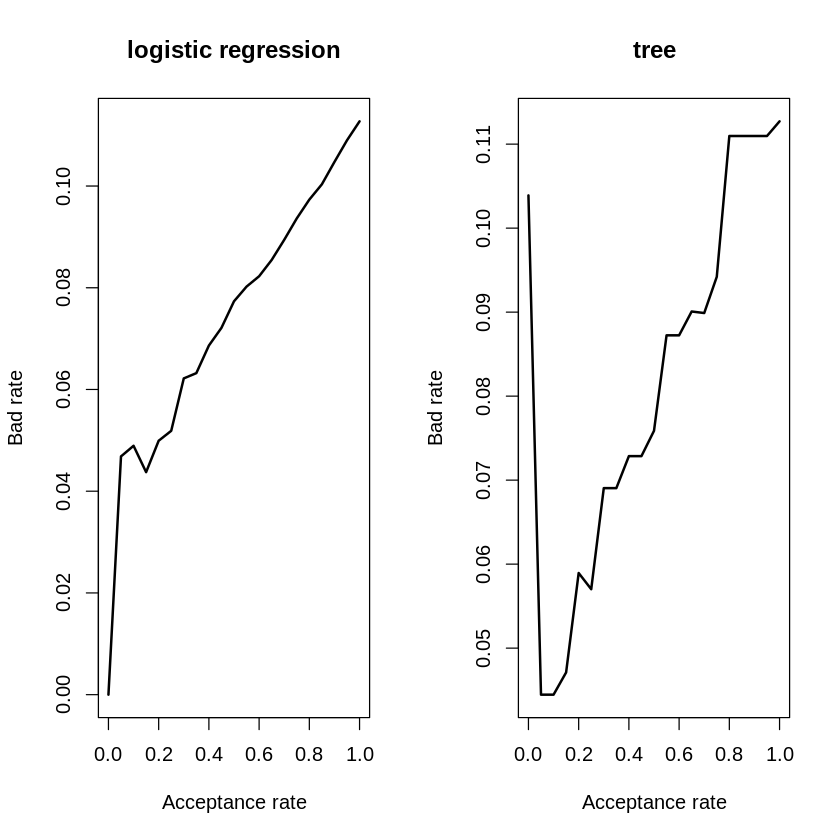

In [135]:
# Plot the strategy functions
par(mfrow = c(1,2))
plot(strategy_cloglog$accept_rate, strategy_cloglog$bad_rate, 
     type = "l", xlab = "Acceptance rate", ylab = "Bad rate", 
     lwd = 2, main = "logistic regression")

plot(strategy_loss_matrix$accept_rate, strategy_loss_matrix$bad_rate, 
     type = "l", xlab = "Acceptance rate", 
     ylab = "Bad rate", lwd = 2, main = "tree")

####**Arborer ou ne pas arborer ?**
+ ***Imaginez que vous ayez 2 banques : la Banque A et la Banque B. Ces banques sont limitées à l'utilisation d'un certain taux d'acceptation.***

  + La banque A doit utiliser un taux d'acceptation de 45 %

  + La banque B doit utiliser un taux d'acceptation de 85 %

+ **Sur la base des tableaux de stratégie, quel modèle la Banque A et la Banque B préféreront-elles utiliser ?**

+ *N'hésitez pas à revoir les tableaux. Ils sont chargés dans votre espace de travail en tant que :*
  + *strategy_cloglog$table* 
  
  + *et strategy_loss_matrix$table.*

####**Instructions**


+ La banque A et la banque B préféreront toutes deux utiliser le modèle de régression logistique (représenté par strategy_cloglog)

+ La banque A et la banque B préféreront toutes deux utiliser le modèle d'arbre de classification (représenté par strategy_loss_matrix)

+ La banque A préférera utiliser le modèle de régression logistique, mais pour la banque B, le modèle d'arbre de classification conduit à un taux de mauvais résultats inférieur.

+ ***La banque A préférera utiliser le modèle d'arbre de classification, mais pour la banque B, le modèle de régression logistique conduit à des taux de mauvais taux inférieurs.***

###**La courbe ROC**

####**1. La courbe ROC**
+ Dans l’exercice précédent,

####**2. Jusqu’à présent**
+ Vous avez vu comment les banques peuvent préférer un modèle à un autre en fonction du « mauvais taux » minimum qu’elles sont autorisées à avoir, ou en le renversant, en fonction de leur taux d’acceptation. 
+ Souvent, les banques veulent simplement savoir quel est le meilleur modèle dans l’ensemble, sans avoir à faire d’hypothèses concernant les taux d’acceptation ou les seuils. Pour illustrer cela,

####**3. Matrice de confusion**
+ Revenons à nos métriques de matrice de décision. 

+ Ici, nous avons appris l’exactitude, la sensibilité et la spécificité. 
+ Nous avons déjà discuté du fait que la précision de la classification inclut tous les éléments de l’ensemble de tests dans le dénominateur et, par conséquent, est tentante à utiliser.

####**4. Exactitude?**
+ Cependant, l’exactitude de la classification est également une mesure problématique dans le contexte de la notation de crédit, car la précision est généralement maximisée lorsqu’un seuil très élevé est choisi ou, en d’autres termes, lorsque tous les éléments de l’ensemble de tests sont classés comme non par défaut. 
+ C’est pourquoi l’une des méthodes les plus populaires pour évaluer les modèles de risque de crédit est basée sur la sensibilité et la spécificité. 
+ Cette méthode d’évaluation est appelée courbe des caractéristiques de fonctionnement du récepteur, souvent appelée

####**5. La courbe ROC**
+ la courbe ROC. La courbe est construite en traçant la sensibilité par rapport à un moins la spécificité pour chaque coupure possible. La courbe commence toujours dans le coin inférieur gauche, où la sensibilité est 0 et la spécificité est 1,

####**6. La courbe ROC**
+ correspondant à un seuil de 1, ce qui signifie classer tous les cas comme non-défauts. L’autre extrémité de la courbe dans le coin supérieur droit

####**7. La courbe ROC**
+ correspond à un seuil égal à zéro, où la sensibilité est égale à 1 et la spécificité est égale à 0.

####**8. La courbe ROC**
+ D’une manière générale, plus une courbe ROC est proche

####**9. La courbe ROC**
+ est dans le coin supérieur gauche, mieux c’est. 
+ Ces courbes ont des spécificités plus élevées associées à des sensibilités plus élevées. À l’autre extrême, une ligne de 45 degrés,

####**10. La courbe ROC**
+ Comme l’indique la ligne rouge ici, serait le résultat de l’affectation aléatoire des cas au groupe par défaut par rapport au groupe non par défaut plutôt que par le biais d’un modèle. 
+ En réalité, lorsque vous comparez des modèles, vous verrez souvent que les différences entre plusieurs courbes ROC ne sont pas aussi claires que celles montrées dans les diapositives précédentes. 
+ De plus, les courbes ROC peuvent sembler différentes mais montrer des croisements, ce qui rend difficile de dire quel modèle est le meilleur.

####**11. Lequel est le meilleur?**
+ Ce problème est illustré ici par des courbes ROC pour deux modèles : 
  + une courbe ROC noire pour le modèle A et une courbe ROC bleue pour le modèle B. 
  + Une mesure que les banques aiment utiliser lorsqu’elles comparent les courbes ROC est ce que l’on appelle la « zone sous la courbe » de ces courbes ROC, également appelée AUC. 
  + L’AUC d’un modèle est comprise entre le point-5 (qui correspond à la ligne diagonale rouge montrée précédemment) et 1 (qui correspondrait à un modèle parfait). 
  + En calculant l’AUC ici, nous voyons que le modèle B conduit à une AUC plus élevée et devrait être préféré au modèle A.

####**12. Entraînons-nous!**
+ Jetons un coup d’œil à quelques courbes ROC pour les modèles que nous avons construits précédemment!

###**EXERCICES**


####**Courbes ROC pour la comparaison des modèles de régression logistique**

+ ***Les courbes ROC peuvent facilement être créées à l'aide du package pROC dans R. Voyons s'il existe une grande différence entre les courbes ROC pour les quatre modèles de régression logistique précédemment utilisés tout au long de ce cours. Un petit avertissement :***

  + `predictions_logit` contient des prédictions de probabilité de défaut (PD) utilisant le lien logit par défaut et contenant les variables age, emp_cat, ir_cat et loan_amnt.
  + `predictions_probit` contient des prédictions PD utilisant le probit et contenant les variables age, emp_cat, ir_cat et loan_amnt.
  + `predictions_cloglog` contient des prédictions PD utilisant le lien cloglog et contenant les variables age, emp_cat, ir_cat et loan_amnt.
  + `predictions_all_full` contient des prédictions PD utilisant le lien logit par défaut et contenant les sept variables de l'ensemble de données.

+ *Vous allez d'abord dessiner les courbes ROC pour ces quatre modèles dans un seul tracé. Ensuite, vous regarderez la zone sous la courbe.*

####**Instructions**

+ Chargez le package pROC dans votre console R.

+ Construisez les objets ROC pour les quatre modèles de régression logistique à l'aide de la fonction roc (réponse, prédicteur). 
+ N'oubliez pas que la réponse est l'indicateur de statut de prêt dans le test_set, qui peut être obtenu via test_set$loan_status.

+ Utilisez les objets créés précédemment pour construire des courbes ROC. 
+ 
+ Pour les dessiner tous sur un seul tracé, utilisez plot() pour la première courbe ROC dessinée (pour ROC_logit), et utilisez [lines()](https://www.rdocumentation.org/packages/graphics/functions/lines) pour ajoutez les courbes ROC pour les trois autres modèles au même tracé.
Utilisez l'argument col pour changer la couleur de la courbe de ROC_probit en "bleu", ROC_cloglog en "rouge" et ROC_all_full en "vert". 
+ Notez que, contrairement à ce qui a été discuté dans la vidéo, l'étiquette de l'axe des x est Spécificité et non "1-Spécificité", ce qui donne un axe qui va de 1 à gauche à 0 à droite côté.
+ Il semble que la fonction de lien n'ait pas un grand impact sur le ROC ici, et le principal déclencheur d'un meilleur ROC est l'inclusion de plus de variables dans un modèle. 
+ Pour avoir une idée exacte de la performance des courbes ROC, regardez les AUC, en utilisant la fonction auc().

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



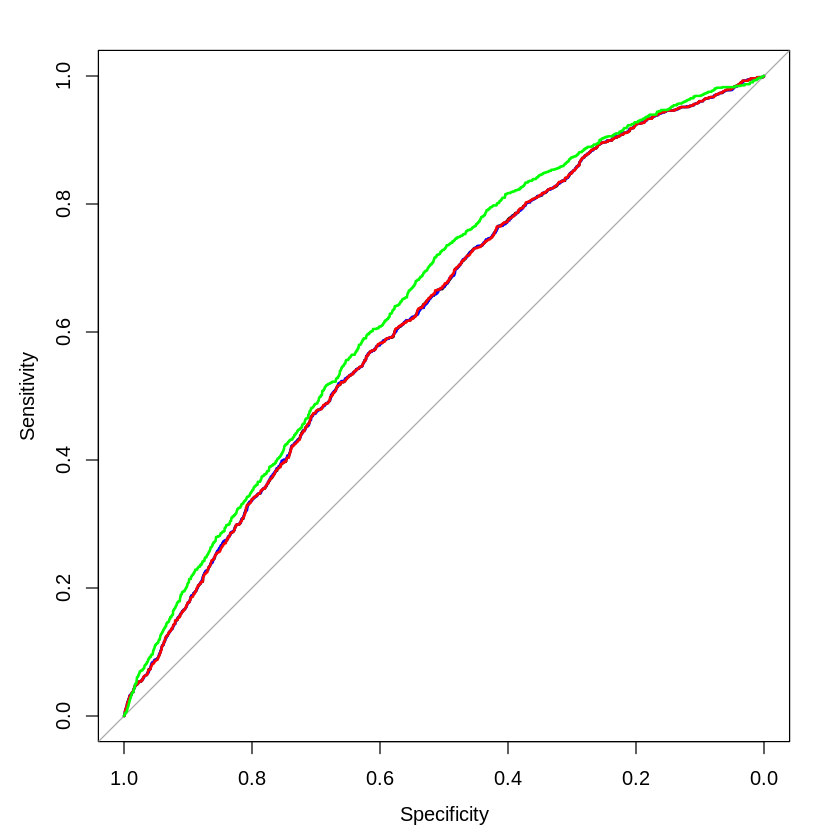

In [136]:
# Load the pROC-package
library(pROC)

# Construct the objects containing ROC-information
ROC_logit <- roc(test_set$loan_status, predictions_logit)
ROC_probit <- roc(test_set$loan_status, predictions_probit)
ROC_cloglog <- roc(test_set$loan_status, predictions_cloglog)
ROC_all_full <- roc(test_set$loan_status, predictions_all_full)

# Draw all ROCs on one plot
plot(ROC_logit)
lines(ROC_probit, col="blue")
lines(ROC_cloglog, col="red")
lines(ROC_all_full, col="green")

In [137]:
# Compute the AUCs
auc(ROC_logit)
auc(ROC_probit)
auc(ROC_cloglog)
auc(ROC_all_full)

Area under the curve: 0.6263

Area under the curve: 0.6263

Area under the curve: 0.6263

Area under the curve: 0.6481

####**Courbes ROC pour la comparaison de modèles arborescents**

+ ***Il est temps pour vous de répéter les exercices précédents, en comparant maintenant les modèles arborescents. Le pROC() est maintenant chargé dans votre espace de travail. Les prédictions PD pour les méthodes arborescentes sont stockées dans les objets***

      predictions_undersample
      predictions_prior
      predictions_loss_matrix
      predictions_weights

####**Instructions**

+ Construisez les objets ROC pour les méthodes basées sur l'arbre à l'aide de la fonction roc (réponse, prédicteur).
+ Utilisez les objets créés précédemment pour construire des courbes ROC. 
+ Pour les dessiner tous sur un seul tracé, utilisez plot() pour la première courbe ROC dessinée (pour ROC_undersample) et lines() pour les trois autres modèles sur le même tracé. 
+ Utilisez l'argument col pour changer la couleur de la courbe de ROC_prior en bleu, ROC_loss_matrix en rouge et ROC_weights en vert.
+ Pour avoir une meilleure idée de la performance des courbes ROC, regardez les AUC en utilisant la fonction auc().

In [139]:
predictions_undersample <- predict(tree_undersample, newdata = test_set)[,2]
predictions_prior <- predict(tree_prior, newdata = test_set)[,2]
predictions_loss_matrix <- predict(ptree_loss_matrix, newdata = test_set)[,2]
predictions_weights <- predict(tree_weights , newdata = test_set)[,2]

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



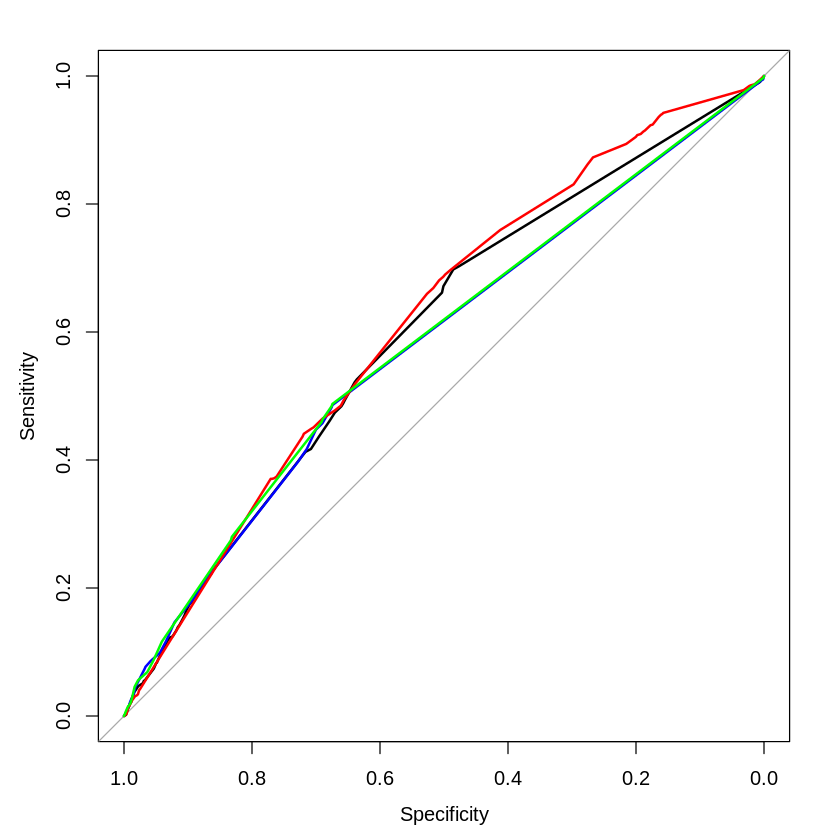

In [140]:
# Construct the objects containing ROC-information
ROC_undersample <- roc(test_set$loan_status, predictions_undersample)
ROC_prior <- roc(test_set$loan_status, predictions_prior)
ROC_loss_matrix <- roc(test_set$loan_status, predictions_loss_matrix)
ROC_weights <- roc(test_set$loan_status, predictions_weights)

# Draw the ROC-curves in one plot
plot(ROC_undersample)
lines(ROC_prior, col="blue")
lines(ROC_loss_matrix, col="red")
lines(ROC_weights, col="green")

In [141]:
# Compute the AUCs
auc(ROC_undersample)
auc(ROC_prior)
auc(ROC_loss_matrix)
auc(ROC_weights)

Area under the curve: 0.6016

Area under the curve: 0.5821

Area under the curve: 0.617

Area under the curve: 0.5858

###**Sélection des entrées en fonction de l' AUC**

####**1. Sélection des entrées en fonction de l' AUC**

+ ***Dans les exercices précédents, vous avez vu comment vous pouvez construire des courbes ROC pour chacun des modèles que vous avez installés. Jetons un nouvel œil aux courbes ROC pour les modèles de régression logistique.***

####**2. Courbes ROC pour 4 modèles de régression logistique**
+ Nous avons examiné quatre modèles de régression logistique :

####**3. Courbes ROC pour 4 modèles de régression logistique**
+ trois modèles, dont quatre variables et à chaque fois une autre fonction de liaison (logit, probit et cloglog),

####**4. Courbes ROC pour 4 modèles de régression logistique**
+ et un avec les sept variables utilisant un lien logit. En regardant les courbes ROC, il semble que, pour les données que nous avons utilisées, la fonction de liaison n’a pas un grand impact sur le ROC lorsque l’on inclut les mêmes variables. 

+ La courbe ROC s’améliore nettement, cependant, en passant de 4 variables à 7 dans le modèle. 

+ De cette façon, la courbe ROC (ou, plus précisément, l' AUC) pourrait être utilisée ici pour la sélection des variables. 

+ En fait, les banques sont particulièrement intéressées à savoir quelles variables sont importantes pour prédire le défaut de paiement. 

+ Comme indiqué précédemment et illustré ici à l’aide du modèle logit, y compris tous les paramètres, vous pouvez également examiner les valeurs p individuelles des estimations de paramètres pour voir quelles variables sont plus ou moins importantes. 

+ Dans les modèles de régression en général, les procédures par étapes supprimant ou insérant des variables et évaluant leurs valeurs p sont un moyen populaire d’effectuer la sélection des variables. 

+ Toutefois, si vous évaluez ce modèle en fonction des performances de classification, il peut être utile d’examiner la performance de l' AUC de ce modèle pour la sélection des variables plutôt que les valeurs p.

####**5. Élagage basé sur l’AUC**
+ Cette ancienne méthode est également appelée élagage basé sur l’AUC. 
+ À l’aide de cette méthode, vous commencez par le modèle, y compris toutes les variables, et calculez l' AUC pour ce modèle.

####**6. Élagage basé sur l’AUC**
+ Dans un deuxième temps, vous ajustez tous les modèles possibles, en excluant une seule des variables à la fois, ce qui conduit à 7 modèles pour notre ensemble de données. 
+ Pour chacun de ces modèles, vous effectuez également la probabilité de prédictions par défaut.

####**7. Élagage basé sur l’AUC**
+ Dans une troisième étape, vous calculez l' AUC pour chacun de ces modèles à l’aide de ces prédictions, et après cela, vous conserverez le modèle avec l' AUC la plus élevée. 

+ Dans ce cas, cela conduirait à la suppression de la variable d’accession à la propriété dans le modèle de régression logistique. 

+ Notez qu’en supprimant cette variable, l' AUC passe du point-6512 au point-6537. 

+ L’élagage basé sur l' AUC se poursuit jusqu’à ce que l' AUC diminue. 

+ Notez que dans certains cas, il peut même être utile de permettre à l' AUC de diminuer légèrement lors de la suppression d’une variable du modèle, car le modèle devient moins complexe, ce qui peut améliorer l’interprétation. 

+ Une méthode similaire pourrait être utilisée pour les arbres de décision, mais elle est moins simple, car d’autres facteurs entrent en jeu; Par exemple, comment un arbre est élagué et quelles variables sont choisies pour une certaine division.

####**8. Entraînons-nous!**
+ Maintenant, vous verrez par vous-même comment nous pouvons simplifier davantage le modèle de régression logistique dont nous venons de discuter en utilisant l’élagage basé sur l’AUC!

###**EXERCICES**

####**Un autre cycle d'élagage basé sur l'AUC**

+ ***Dans la vidéo, vous avez vu comment le modèle de régression logistique "complet" avec un lien logit était élagué en fonction de l'AUC. Vous avez vu comment la variable home_ownership a été supprimée du modèle, car elle améliorait l'AUC globale. Après avoir répété ce processus pour deux tours supplémentaires, les variables age et ir_cat ont été supprimées, conduisant au modèle :***

      log_3_remove_ir <- glm(loan_status ~ loan_amnt + grade + annual_inc + emp_cat, family = binomial, data = training_set)


+ *avec une ASC de 0,6545. Maintenant, c'est à vous de voir si l'ASC peut encore être améliorée en supprimant une autre variable du modèle.*

####**Instructions**

+ Supprimez une variable à la fois dans le modèle log_3_remove_ir. 
+ N'oubliez pas que vous devez utiliser la fonction de lien par défaut (logit).
+ Faites des prédictions de probabilité par défaut pour chacun des modèles que vous avez créés.
+ Utilisez la fonction auc() en utilisant test_set$loan_status comme premier argument et les prédictions pour chacun des quatre modèles comme deuxième argument pour obtenir les AUC de chaque modèle.
+ Copiez le nom de l'objet (comme indiqué dans la première question de cet exercice) qui représente le modèle avec la meilleure AUC.

In [142]:
# Build four models each time deleting one variable in log_3_remove_ir
log_4_remove_amnt <- glm(loan_status ~ grade + annual_inc + emp_cat, 
                        family = binomial, data = training_set) 
log_4_remove_grade <- glm(loan_status ~ loan_amnt+ annual_inc + emp_cat, 
                        family = binomial, data = training_set) 
log_4_remove_inc <- glm(loan_status ~ loan_amnt + grade + emp_cat, 
                        family = binomial, data = training_set) 
log_4_remove_emp <- glm(loan_status ~ loan_amnt + grade + annual_inc , 
                        family = binomial, data = training_set) 

In [143]:
# Make PD-predictions for each of the models
pred_4_remove_amnt <- predict(log_4_remove_amnt, newdata = test_set, type = "response")
pred_4_remove_grade <- predict(log_4_remove_grade, newdata = test_set, type = "response")
pred_4_remove_inc <- predict(log_4_remove_inc, newdata = test_set, type = "response")
pred_4_remove_emp <- predict(log_4_remove_emp, newdata = test_set, type = "response")

In [144]:
# Compute the AUCs
auc(test_set$loan_status, pred_4_remove_amnt)
auc(test_set$loan_status, pred_4_remove_grade) 
auc(test_set$loan_status, pred_4_remove_inc)
auc(test_set$loan_status, pred_4_remove_emp)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6484

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.582

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6366

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.641

####**Meilleur des quatre**
+ ***Les valeurs AUC pour les quatre modèles construits dans l'exercice précédent sont stockées dans***

      AUC_4_remove_amnt
      AUC_4_remove_grade
      AUC_4_remove_inc
      AUC_4_remove_emp

+ *Quel modèle faut-il privilégier en fonction de l'AUC ?*

#####**Instructions**

+ ***log_4_remove_amnt***

+ log_4_remove_grade

+ log_4_remove_inc

+ log_4_remove_emp

####**Réduction supplémentaire du modèle ?**
+ ***En supprimant la variable loan_amnt, l'AUC peut encore être améliorée à 0,6548 ! Le modèle résultant est***

      log_4_remove_amnt <- glm(loan_status ~ grade + annual_inc + emp_cat, family = binomial, data = training_set)


+ *Est-il possible de réduire le modèle de régression logistique à seulement deux variables sans réduire l'AUC ? Dans cet exercice, vous verrez si c'est possible !*

####**Instructions**

+ Encore une fois, supprimez une variable à la fois dans le modèle log_4_remove_amnt. N'oubliez pas que vous devez utiliser la fonction de lien par défaut (logit).

+ Utilisez predict() pour établir la probabilité des prédictions par défaut pour chaque modèle que vous avez créé.

+ Obtenez les AUC pour chacun des trois modèles, en utilisant test_set$loan_status comme premier argument et les prédictions pour chacun des trois modèles comme deuxième argument.

+ Tracez la courbe ROC pour le modèle avec l'AUC la plus élevée dans votre espace de travail, en utilisant plot(roc()) où le contenu de roc() est le même que le contenu de la fonction auc() avec l'AUC la plus élevée. 

+ Notez qu'il est possible que l'AUC ne puisse plus être réduite par rapport au modèle log_4_remove_amnt. 

+ Les prédictions pour ce modèle sont chargées dans votre espace de travail en tant que pred_4_remove_amnt, dans le cas où ce modèle mène à l'AUC la plus élevée.

In [145]:
# Build three models each time deleting one variable in log_4_remove_amnt
log_5_remove_grade <- glm(loan_status ~ annual_inc + emp_cat, family = binomial, data = training_set)  
log_5_remove_inc <- glm(loan_status ~ grade  + emp_cat , family = binomial, data = training_set)
log_5_remove_emp <- glm(loan_status ~ grade + annual_inc, family = binomial, data = training_set)

In [146]:
# Make PD-predictions for each of the models
pred_5_remove_grade <- predict(log_5_remove_grade, newdata = test_set, type = "response")
pred_5_remove_inc <- predict(log_5_remove_inc, newdata = test_set, type = "response")
pred_5_remove_emp <- predict(log_5_remove_emp, newdata = test_set, type = "response")

In [147]:
# Compute the AUCs
auc(test_set$loan_status, pred_5_remove_grade)
auc(test_set$loan_status, pred_5_remove_inc)
auc(test_set$loan_status, pred_5_remove_emp)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.5766

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6345

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6419

Setting levels: control = 0, case = 1

Setting direction: controls < cases



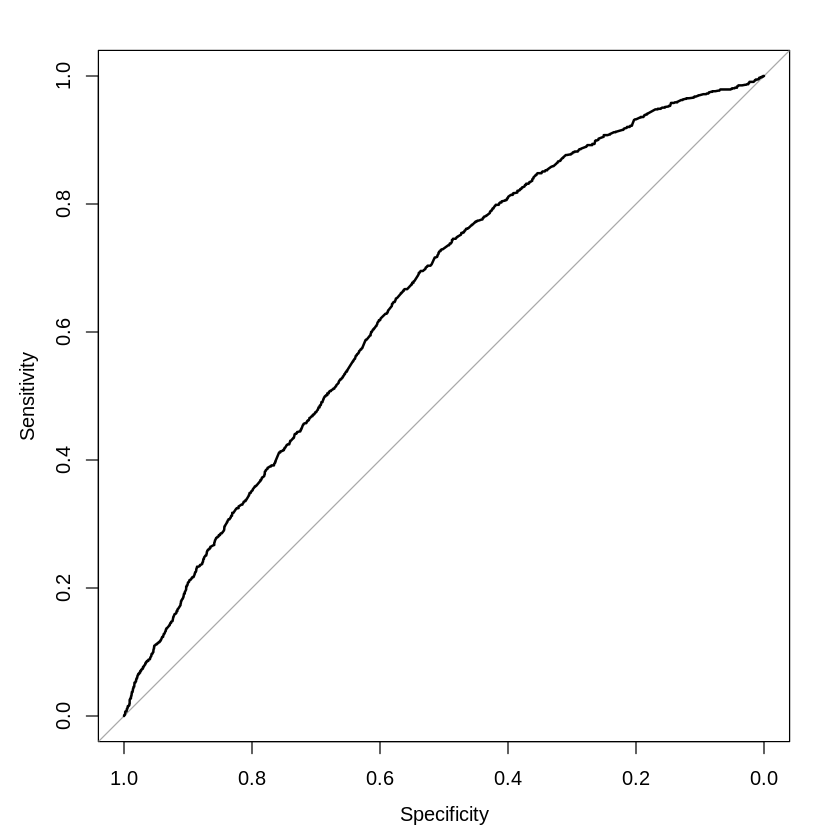

In [148]:
# Plot the ROC-curve for the best model here
plot(roc(test_set$loan_status,pred_4_remove_amnt))